# <font color = '#FF9933'><b> Materials: A Comparison of Linear and Quadratic CV Model </b></font>

## <font color = '#F14040'>Imports </font>

In [128]:
from sys import path as syspath
from os import path as ospath
from os import listdir
import seaborn as sns

#syspath.append(ospath.join(ospath.expanduser("~"), r'\Code_-_Package\EC3'))

#syspath.append(ospath.join(syspath[0], r'\Code_-_Package\EC3'))
folder = r"Insert folder path to append to system path"
syspath.append(folder)
syspath
import EC

from EC.EC3._experiments import CV, GCD, EIS, Material, Study, QR
import EC.EC3._ecplotting as ecp
from EC.EC3._aesthete import *
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
reload(EC.EC3._experiments);
reload(ecp);
reload(EC.EC3._aesthete);

## <font color = '#F14040'>Plot Settings </font>

In [129]:
#_______Create Styles_________

num = 7
colors_cv, lines_broken, markers = select_colors_lines_markers(num, solid_lines = 'none', palette = 'Sequential_Blues')
_, lines_solid, _ = select_colors_lines_markers(num, solid_lines = 'all')
_, lines_first_solid, _ = select_colors_lines_markers(num, solid_lines = 'first')

colors_fit, lines_fit, _ = select_colors_lines_markers(3, solid_lines = 'first', palette = 'Category_3')

#________Special modifications_____
colors_cv[3] = '#E64B35FF'
lines_fit[1], lines_fit[2] = lines_fit[2], lines_fit[1]

#__________Cyclers___________
cycler = plt.cycler(linestyle=lines_solid,color = colors_cv,
                    #marker= markerstyles,
                   )
cycler_broken = plt.cycler(linestyle=lines_broken,color = colors_cv,
                    #marker= markerstyles,
                   )
cycler_first_solid = plt.cycler(linestyle=lines_first_solid,color = colors_cv)

#____Cyclers by diagram____
cycler_cv = plt.cycler(color = colors_cv)
cycler_fit = plt.cycler(linestyle=lines_fit,color = colors_fit)

#_______To use styles________
plt.style.use('seaborn-poster')

#____________________________
legend_style = dict(frameon = False, loc = 2, prop = {'size':10}, ncol = 1)
marker_style = dict(marker='.', 
                    linestyle='--', 
                    color = 'brown',
                    markersize=1,
                    markeredgecolor="brown", 
                    mew=1,
                    #color='brown', 
                    markerfacecolor='white', 
                    fillstyle = 'full', 
                    #markerfacecoloralt='white',
                            )


In [130]:
pm = ecp.plot_modifiers()

## <font color = 'orange'><b>Data</b> </font>

In [131]:
#_____________Import all files into data_dict______________

folder = r"Insert path of folder with porridge files"
from pathlib import Path

p = Path(folder).glob('**/*')
file_names = [x.stem.replace('EC Porridge - ', "") for x in p if x.is_file()]
file_paths = [str(child.resolve()) for child in Path.iterdir(Path(folder))]
file_cat_n_names = [tuple(x.split('_')) for x in file_names]
#display(file_cat_n_names)




#____Create Gheo Materials dictionary____
#Take a file name → Use its name as the key to a dictionary → Create Material objects using name and experiments as keys.
mat_dict = {file_cat_n_names[i]: Material(file_cat_n_names[i][0]+" - "+file_cat_n_names[i][1], experiments = {'CV':1}) for i,f in enumerate(file_paths)};
display(file_cat_n_names)

#____Turn Dictionary to Index and attach file_paths____
mux = pd.MultiIndex.from_tuples(mat_dict.keys(),  names=('Category', 'Name'))
mat_df = pd.DataFrame(list(mat_dict.values()), index=mux)
mat_df.columns = ['Object']
mat_df['file_paths'] = file_paths

#file_names = [f.translate(SUB) for f in file_names]
file_names
#_______Output______
# mat_dict: A multilevel dictionary with tuples as keys
# mat_df: A multindex dataframe

[('MOF', 'CuHKUST'),
 ('MOF', 'CuMnMOF'),
 ('MOF', 'LiCuMOF'),
 ('MOF', 'MnMOF'),
 ('MOF', 'ZnMOF'),
 ('Mxene', 'Ti3C2'),
 ('Oxide', 'Co3O4'),
 ('Oxide', 'Pr2O3'),
 ('Oxide', 'SrO-PANI'),
 ('Oxide', 'Yb2O3'),
 ('Phosphate', 'Co3(PO4)2'),
 ('Phosphate', 'NiMn(PO4)2'),
 ('Phosphate', 'Zn3PO4'),
 ('Sulfide', 'MnCoS'),
 ('Sulfide', 'NiMnS'),
 ('Sulfide', 'ZnS')]

['MOF_CuHKUST',
 'MOF_CuMnMOF',
 'MOF_LiCuMOF',
 'MOF_MnMOF',
 'MOF_ZnMOF',
 'Mxene_Ti3C2',
 'Oxide_Co3O4',
 'Oxide_Pr2O3',
 'Oxide_SrO-PANI',
 'Oxide_Yb2O3',
 'Phosphate_Co3(PO4)2',
 'Phosphate_NiMn(PO4)2',
 'Phosphate_Zn3PO4',
 'Sulfide_MnCoS',
 'Sulfide_NiMnS',
 'Sulfide_ZnS']

### <font color = 'orange'><b>Clean: Clean_Porridge & Load Cycle </b> </font>

In [132]:
st = Study(mat_df)
st.Clean_CV_Porridge(cv_cycle = 2)

MOF - CuHKUST
MOF - CuMnMOF
MOF - LiCuMOF
MOF - MnMOF
MOF - ZnMOF
Mxene - Ti3C2
Oxide - Co3O4
Oxide - Pr2O3
Oxide - SrO-PANI
Oxide - Yb2O3
Phosphate - Co3(PO4)2
Phosphate - NiMn(PO4)2
Phosphate - Zn3PO4
Sulfide - MnCoS
Sulfide - NiMnS
Sulfide - ZnS


In [133]:
name_lat = [r"MOF - CuMnMOF", #HKUST (BTC): 
            r"MOF - HKUST", #Huan -> CuBTC
            r"MOF - MnMOF", #MnBTC, 24 hour synthesis
            r"MOF - MnMOF 12 BTC", #MnBTC, → REMOVE
            r"MOF - ZnMOF", #???? → REMOVE
            r"Mxene - Ti$_\mathrm{3}$C$_\mathrm{2}$",
            #r"Oxide - Ag$_2$O",
            r"Oxide - Co$_3$O$_4$",
            r"Oxide - Pr$_\mathrm{2}$O$_\mathrm{3}$",
            r"Oxide - SrO/PANI Gr",
            r"Oxide - Yb$_\mathrm{2}$O$_\mathrm{3}$",
            r"Phosphate - Co$_\mathrm{3}$(PO$_\mathrm{4})_\mathrm{2}$",
            r"Phosphate - NiMn(PO$_\mathrm{4}$)$_\mathrm{2}$",
            r"Phosphate - Zn$_\mathrm{3}$PO$_\mathrm{4}$",
            r"Sulfide - MnCoS",
            r"Sulfide - NiMnS",
            r"Sulfide - ZnS"]


l = []
for m in st.mats['Object']:
    l.append(m.name)

name_dic = {}
for (c, n) in zip(l, name_lat):
    name_dic[c] = n
name_dic

name_dic_cond = {k.split(" - ")[1]:v.split(" - ")[1] for (k,v) in name_dic.items()}
name_dic_cond                           



{'CuHKUST': 'CuMnMOF',
 'CuMnMOF': 'HKUST',
 'LiCuMOF': 'MnMOF',
 'MnMOF': 'MnMOF 12 BTC',
 'ZnMOF': 'ZnMOF',
 'Ti3C2': 'Ti$_\\mathrm{3}$C$_\\mathrm{2}$',
 'Co3O4': 'Co$_3$O$_4$',
 'Pr2O3': 'Pr$_\\mathrm{2}$O$_\\mathrm{3}$',
 'SrO-PANI': 'SrO/PANI Gr',
 'Yb2O3': 'Yb$_\\mathrm{2}$O$_\\mathrm{3}$',
 'Co3(PO4)2': 'Co$_\\mathrm{3}$(PO$_\\mathrm{4})_\\mathrm{2}$',
 'NiMn(PO4)2': 'NiMn(PO$_\\mathrm{4}$)$_\\mathrm{2}$',
 'Zn3PO4': 'Zn$_\\mathrm{3}$PO$_\\mathrm{4}$',
 'MnCoS': 'MnCoS',
 'NiMnS': 'NiMnS',
 'ZnS': 'ZnS'}

## <font color = '#43ABC('><b>Computation </b> </font>

### <font color = '#43ABC9'><b>Lin & Quad </b> </font>

In [134]:
for m in st.mats['Object']:
    print(m.name)
    
    m.cv.find_ibysqrtv()
    m.cv.find_lin_reg_param()
    m.cv.find_lin_cap_diff()
    m.cv.find_quad_reg_param()
    m.cv.find_quad_cap_diff()


MOF - CuHKUST
MOF - CuMnMOF
MOF - LiCuMOF
MOF - MnMOF
MOF - ZnMOF
Mxene - Ti3C2
Oxide - Co3O4
Oxide - Pr2O3
Oxide - SrO-PANI
Oxide - Yb2O3
Phosphate - Co3(PO4)2
Phosphate - NiMn(PO4)2
Phosphate - Zn3PO4
Sulfide - MnCoS
Sulfide - NiMnS
Sulfide - ZnS


### <font color = '#43ABC9'><b>Residuals at voltages </b> </font>

In [135]:
# Find residuals at specific voltages for a residual plot.
m = st.mats.iloc[3,0]
m.cv.find_residuals_at(which = 'lin', sr = 20)
m.cv.residuals_at

# for m in st.mats['Object']:
#     print(m.name)
#     m.cv.find_residuals_at(which = 'lin', sr = 20)

,Voltage,Scan,SR,Residual
LinearResidualsAt,,,,
0,0.2,Forward,3,0.001000
1,0.2,Reverse,3,0.006197
2,0.2,Forward,5,-0.000128
3,0.2,Reverse,5,0.000226
4,0.2,Forward,10,-0.001375
5,0.2,Reverse,10,0.001682
6,0.2,Forward,20,-0.001581
7,0.2,Reverse,20,-0.028583
8,0.2,Forward,30,-0.000939


### <font color = '#43ABC9'><b>Find Current Peaks </b> </font>

In [136]:
#___find peaks___
# for m in mat_df['Object']:
#     print(m.name)
#     m.cv.find_current_peaks(lookup_in = (0,350), add_offset = True,  width = 1, height = 0.01, rel_height = 1)
    
for m in st.mats['Object']:
    m.cv.find_current_peaks(frac = (0,0.49), add_offset = False, index_as_peaks = True,  width = 1, height = 0.001, rel_height = 1)
    
#___________Create DataFrame for Peaks___________
def create_peak_dataframe():
    """
    Create dataframe for peaks, ignoriing stray peaks. 
    """
    df_peaks = pd.DataFrame()
    for j, (ind, group) in enumerate(st.mats.groupby(level=0)):

        legend = group.index
        for i, m in enumerate(group['Object']):
            if 0 in m.cv.current_peaks.index: #0 indicates the first peak.
                filtered = m.cv.current_peaks.loc[[0],:].copy()

                filtered['SR_root'] = np.sqrt(filtered['SR'])
                filtered = filtered[['SR', 'SR_root', 'peak_heights', 'peaks']] #peaks is index, peak_heights is current value.

                index_list = [(group.index[0][0], m.name.split('- ')[1])]*filtered.shape[0]
                index = pd.MultiIndex.from_tuples(index_list, names=["Group", "Material"])
                filtered.index = index
                
               
                #____Also find peak drifts_____
#                 from scipy import stats
    
#                 #sr = np.array(filtered['SR_root']**2, dtype = 'float')
#                 sr = np.array(filtered['SR_root'], dtype = float)
#                 v_ind = filtered['peaks'] 
#                 v = np.array(m.cv.voltages.loc[v_ind].loc[:,'Vf20'], dtype = 'float') #Voltages

    
#                 c = filtered['peak_heights'] #Currents                
        
        
#                 #____Find Peak Drift___
            ################################################## INCORRECT #############################
#                 peak_drift = stats.linregress(sr, v) #[['slope','rvalue']]
#                 filtered['peak_drift(V/mVs^-1)'] = peak_drift.slope
#                 print(m.name, ":\t", peak_drift.rvalue)
                


                
                df_peaks = (pd.concat([df_peaks, filtered], axis = 0))

                
    return df_peaks

df_peaks = create_peak_dataframe()
# peak_drift = pd.DataFrame(df_peaks.groupby(level = 1).describe().filter(regex = 'peak_drift').iloc[:,1])
df_peaks
#df_peaks.loc[('MOF', 'HKUST')]

SR   SR_root  peak_heights  peaks
Group   Material                                   
MOF     CuHKUST    3  1.732051      0.001135    861
        CuHKUST    5  2.236068      0.067862   1006
        CuHKUST   10  3.162278      0.094080   1036
        CuMnMOF    3  1.732051      0.001075    863
        CuMnMOF    5  2.236068      0.001028    828
...               ..       ...           ...    ...
Sulfide NiMnS     20  4.472136      0.041810    857
        NiMnS     30  5.477226      0.050282    862
        NiMnS     40  6.324555      0.057417    871
        ZnS       10  3.162278      0.001336    922
        ZnS       20  4.472136      0.050765   1030

[71 rows x 4 columns]

### <font color = '#43ABC9'><b>Find Power, Energy, Capacity, Capacitiveness, RMSE </b> </font>

In [151]:
#______#Study Groups and Materials_____ -> Make study attributes
group = [i[0] for i in st.mats.index]
material = [i[1] for i in st.mats.index]

#_____Names________
tuples = zip(group, material)
index = pd.MultiIndex.from_tuples(tuples, names=["Group", "Material"])




df_cap_pow_en = pd.DataFrame()

for i, m in enumerate(st.mats['Object']):
    #_____________Computations________________
    m.cv.find_capacity(frac = (0,0.5))
    m.cv.find_power(frac = (0,0.5))
    m.cv.find_energy(frac = (0,0.5))
    m.cv.find_capacitiveness_max_current_method()
    m.cv.find_rmse(which = 'both')
    

    
    #____________Append to dataframe_______________
    c, p, e, cness, rmse = m.cv.capacity, m.cv.power ,m.cv.energy, m.cv.capacitiveness, m.cv.rmse
    record = pd.concat([c,p,e, cness, rmse], axis = 1)
    df_cap_pow_en = pd.concat([df_cap_pow_en, record], axis = 0)

#______DataFrame________    
df_cap_pow_en.index = index
df_cap_pow_en['id'] = df_cap_pow_en.index
df_cap_pow_en = pd.wide_to_long(df_cap_pow_en, ['Q', 'P', 'E', 'Cness', 'RMSE Linear','RMSE Quadratic', ], i = 'id', j = 'SR', suffix='@\\d+mV/s')
df_cap_pow_en['SR']=[i[1] for i in df_cap_pow_en.index]
df_cap_pow_en = df_cap_pow_en.droplevel('SR', axis = 0)
df_cap_pow_en.rename(columns = {'Q': 'Capacity', 'P':'Power', 'E':'Energy', 'Cness':'Capacitiveness'}, inplace = True)
df_cap_pow_en['SR'] = df_cap_pow_en['SR'].str.extract('(\d+)', expand=False)

#______Dataframe index fix___________
col_grp, col_mat = zip(*df_cap_pow_en.index)
index = pd.MultiIndex.from_tuples(zip(col_grp, col_mat), names=["Group", "Material"])
df_cap_pow_en.index = index

#______Derived columns____________
df_cap_pow_en["RMSE Ratio"] = df_cap_pow_en['RMSE Quadratic']/df_cap_pow_en['RMSE Linear']
df_cap_pow_en["RMSE Diff"] = df_cap_pow_en['RMSE Linear']-df_cap_pow_en['RMSE Quadratic']

#______Save dataframe________
df_cap_pow_en.to_csv(r'../Data - From Code/DF - Cap_Pow_Ene.csv', index = True)
display(df_cap_pow_en)


Capacity     Power    Energy Capacitiveness  \
Group     Material                                                  
MOF       CuHKUST     3.354703  0.010064  0.388128       0.271894   
          CuMnMOF     1.257518  0.003773  0.208960       0.232638   
          LiCuMOF     1.387889  0.004164  0.140831       0.252063   
          MnMOF       3.465007  0.010395  0.491225       0.282601   
          ZnMOF       2.858793  0.008576  0.317109       0.268416   
...                        ...       ...       ...            ...   
Phosphate NiMn(PO4)2       NaN       NaN       NaN            NaN   
          Zn3PO4           NaN       NaN       NaN            NaN   
Sulfide   MnCoS            NaN       NaN       NaN            NaN   
          NiMnS            NaN       NaN       NaN            NaN   
          ZnS         0.122427  0.008570  0.002528       0.146379   

                      RMSE Linear  RMSE Quadratic  SR  RMSE Ratio  RMSE Diff  
Group     Material                                                            
MOF       CuHKUST        0.004100        0.001688   3    0.411753   0.002412  
          CuMnMOF        0.002308        0.000979   3    0.424215   0.001329  
          LiCuMOF        0.001625        0.000632   3    0.388629   0.000994  
          MnMOF          0.003848        0.001837   3    0.477281   0.002011  
          ZnMOF          0.003322        0.001460   3    0.439625   0.001861  
...                           ...             ...  ..         ...        ...  
Phosphate NiMn(PO4)2          NaN             NaN  70         NaN        NaN  
          Zn3PO4              NaN             NaN  70         NaN        NaN  
Sulfide   MnCoS               NaN             NaN  70         NaN        NaN  
          NiMnS               NaN             NaN  70         NaN        NaN  
          ZnS            0.002569        0.000594  70    0.231103   0.001975  

[144 rows x 9 columns]

### <font color = '#43ABC9'><b>Merge Peaks and Power Dataframes and Create Summary </b> </font>

In [138]:
from IPython.display import HTML
def View(df):
    css = """<style>
    table { border-collapse: collapse; border: 3px solid #eee; }
    table tr th:first-child { background-color: #eeeeee; color: #333; font-weight: bold }
    table thead th { background-color: #eee; color: #000; }
    tr, th, td { border: 1px solid #ccc; border-width: 1px 0 0 1px; border-collapse: collapse;
    padding: 3px; font-family: monospace; font-size: 10px }</style>
    """
    s  = '<script type="text/Javascript">'
    s += 'var win = window.open("", "Title", "toolbar=no, location=no, directories=no, status=no, menubar=yes, scrollbars=yes, resizable=yes, width=780, height=200, top="+(screen.height-400)+", left="+(screen.width-840));'
    s += 'win.document.body.innerHTML = \'' + (df.to_html() + css).replace("\n",'\\') + '\';'
    s += '</script>'
    return(HTML(s+css))

In [139]:
df_peaks['SR']=df_peaks['SR'].astype(int)
df_cap_pow_en['SR']=df_cap_pow_en['SR'].astype(int)

df_summary = df_cap_pow_en.merge(df_peaks, 
                    how = 'left', 
                    on = ['Group', 'Material', 'SR'],
                    #left_on = 'SR', 
                    #right_on = 'SR',
                    #left_index = True,
                    #right_index = True,
                   )
#df_only_peaks = df_only_peaks.query("SR_x == SR_y")

display(df_summary)
df_summary.to_csv(r'../Data - From Code/df_summary.csv')
df_cap_pow_en.to_csv(r'../Data - From Code/df_cap_pow_en.csv')
df_peaks.to_csv(r'../Data - From Code/df_peaks.csv')



Capacity     Power    Energy Capacitiveness  \
Group     Material                                                  
MOF       CuHKUST     3.354703  0.010064  0.388128       0.271894   
          CuMnMOF     1.257518  0.003773  0.208960       0.232638   
          LiCuMOF     1.387889  0.004164  0.140831       0.252063   
          MnMOF       3.465007  0.010395  0.491225       0.282601   
          ZnMOF       2.858793  0.008576  0.317109       0.268416   
...                        ...       ...       ...            ...   
Phosphate NiMn(PO4)2       NaN       NaN       NaN            NaN   
          Zn3PO4           NaN       NaN       NaN            NaN   
Sulfide   MnCoS            NaN       NaN       NaN            NaN   
          NiMnS            NaN       NaN       NaN            NaN   
          ZnS         0.122427  0.008570  0.002528       0.146379   

                      RMSE Linear  RMSE Quadratic  SR  RMSE Ratio  RMSE Diff  \
Group     Material                                                             
MOF       CuHKUST        0.004100        0.001688   3    0.411753   0.002412   
          CuMnMOF        0.002308        0.000979   3    0.424215   0.001329   
          LiCuMOF        0.001625        0.000632   3    0.388629   0.000994   
          MnMOF          0.003848        0.001837   3    0.477281   0.002011   
          ZnMOF          0.003322        0.001460   3    0.439625   0.001861   
...                           ...             ...  ..         ...        ...   
Phosphate NiMn(PO4)2          NaN             NaN  70         NaN        NaN   
          Zn3PO4              NaN             NaN  70         NaN        NaN   
Sulfide   MnCoS               NaN             NaN  70         NaN        NaN   
          NiMnS               NaN             NaN  70         NaN        NaN   
          ZnS            0.002569        0.000594  70    0.231103   0.001975   

                       SR_root  peak_heights  peaks  
Group     Material                                   
MOF       CuHKUST     1.732051      0.001135  861.0  
          CuMnMOF     1.732051      0.001075  863.0  
          LiCuMOF     1.732051      0.023595  999.0  
          MnMOF       1.732051      0.001067  781.0  
          ZnMOF       1.732051      0.001049  869.0  
...                        ...           ...    ...  
Phosphate NiMn(PO4)2       NaN           NaN    NaN  
          Zn3PO4           NaN           NaN    NaN  
Sulfide   MnCoS            NaN           NaN    NaN  
          NiMnS            NaN           NaN    NaN  
          ZnS              NaN           NaN    NaN  

[144 rows x 12 columns]

### <font color = '#43ABC9'><b> Create Ragone DataFrame </b> </font>

In [140]:
def create_ragone_df(df_cap_pow_en):

    df_ragone = df_cap_pow_en[['Capacity', 'Power', 'Energy', 'SR']]
    df_ragone.columns = ['Capacity (C/g)', 'Power (W/g)', 'Energy (J/g)', 'SR']

    df_ragone = pd.concat([df_ragone, st.mats[['Object']]], axis=1) # Perform an outer join
    df_ragone['Object']

    from operator import attrgetter
    df_ragone['Active_Mass(g)'] = df_ragone["Object"].map(attrgetter("cv.active_mass")).tolist()
    df_ragone['Capacity (C/g)']/=(df_ragone['Active_Mass(g)'])
    df_ragone['Power (W/g)']/=(df_ragone['Active_Mass(g)'])
    df_ragone['Energy (J/g)']/=(df_ragone['Active_Mass(g)'])
    #f_ragone.rename(columns = {'Capacity': 'C'})
    df_ragone.index.names = ['Group', 'Material']
    
    return df_ragone
df_ragone = create_ragone_df(df_cap_pow_en)
df_ragone

Capacity (C/g)  Power (W/g)  Energy (J/g)  SR  \
Group     Material                                                    
MOF       CuHKUST         670.940653     2.012822     77.625650   3   
          CuMnMOF         251.503680     0.754511     41.791915   3   
          LiCuMOF         277.577726     0.832733     28.166202   3   
          MnMOF           693.001472     2.079004     98.245035   3   
          ZnMOF           571.758616     1.715276     63.421797   3   
...                              ...          ...           ...  ..   
Phosphate NiMn(PO4)2             NaN          NaN           NaN  70   
          Zn3PO4                 NaN          NaN           NaN  70   
Sulfide   MnCoS                  NaN          NaN           NaN  70   
          NiMnS                  NaN          NaN           NaN  70   
          ZnS              24.485476     1.713983      0.505506  70   

                                                                 Object  \
Group     Material                                                        
MOF       CuHKUST     <EC.EC3._experiments.Material object at 0x0000...   
          CuMnMOF     <EC.EC3._experiments.Material object at 0x0000...   
          LiCuMOF     <EC.EC3._experiments.Material object at 0x0000...   
          MnMOF       <EC.EC3._experiments.Material object at 0x0000...   
          ZnMOF       <EC.EC3._experiments.Material object at 0x0000...   
...                                                                 ...   
Phosphate NiMn(PO4)2  <EC.EC3._experiments.Material object at 0x0000...   
          Zn3PO4      <EC.EC3._experiments.Material object at 0x0000...   
Sulfide   MnCoS       <EC.EC3._experiments.Material object at 0x0000...   
          NiMnS       <EC.EC3._experiments.Material object at 0x0000...   
          ZnS         <EC.EC3._experiments.Material object at 0x0000...   

                      Active_Mass(g)  
Group     Material                    
MOF       CuHKUST              0.005  
          CuMnMOF              0.005  
          LiCuMOF              0.005  
          MnMOF                0.005  
          ZnMOF                0.005  
...                              ...  
Phosphate NiMn(PO4)2           0.005  
          Zn3PO4               0.005  
Sulfide   MnCoS                0.005  
          NiMnS                0.005  
          ZnS                  0.005  

[144 rows x 6 columns]

## <font color = '#F14040'><b>Plotting</b> </font>

### <font color = '#F14040'><b>Plot CVs</b> </font>

In [ ]:
height = 4
fig, ax0 = plt.subplots(figsize = (height, height))



for m in mat_df['Object']:
    fig, ax0 = plt.subplots(figsize = (height, height));
    ecp.plotcv(ax0, m.cv.voltages, m.cv.currents.iloc[:, 2],  
               legend = m.cv.cv_legend,  
               cycler=cycler, 
               legend_dic = legend_style, 
               #marker_dic = marker_style,
           #**other
              );
    ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)


### <font color = '#F14040'><b>Plot CVs - Grid</b> </font>

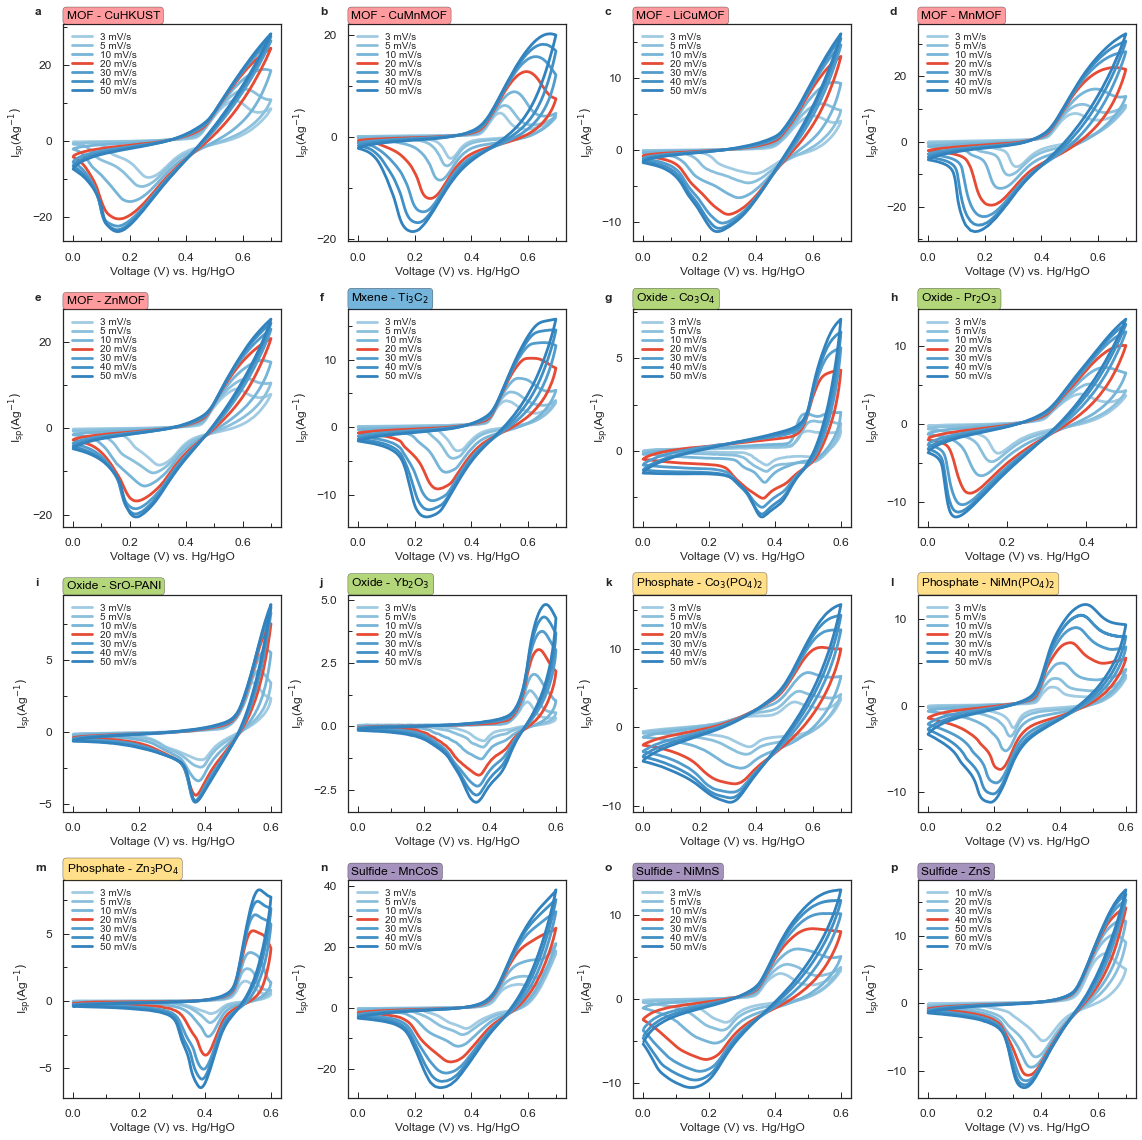

In [141]:
import itertools

fig = plt.figure(figsize = (16,16), tight_layout = True)
shape = (4,4)
loc = iter([(i,j) for i in range(shape[0]) for j in range(shape[1])])
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

for j, (ind, group) in enumerate(mat_df.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]
    
    for i, m in enumerate(group['Object']):
        #styl=styl_list[i % 4]
        ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);
        ax0.text(0.015, 1.015, s = m.nameLTX, bbox=dict(facecolor=clrr, edgecolor = 'black', alpha=0.6, boxstyle='round'), color = 'black', horizontalalignment='left', verticalalignment='bottom',transform=ax0.transAxes, )
        # ax0.annotate(m.nameLTX, (0, 0),
        #              xytext=(0.01, 1.015), textcoords='axes fraction',
        #              xycoords = 'figure points',
        #              bbox=dict(facecolor=clrr, edgecolor = 'black', alpha=0.6, boxstyle='round', pad = 0.35),
        #              fontsize=11,
        #              horizontalalignment='left', verticalalignment='bottom')


        ax0.set_box_aspect(1)

        ecp.plotcv(ax0, m.cv.voltages, 
                   m.cv.currents/m.cv.active_mass,
                   ylabel = pm.ltx_str('I', 'specific'),

                   legend = m.cv.cv_legend,  
                   cycler=cycler_cv, 
                   legend_dic = legend_style, 
                  );
ecp.plot_modifiers().annotate()


### <font color = '#F14040'><b>Plotly - CVs </b> </font>

In [ ]:
import numpy as np
import plotly.graph_objs as go
from itertools import cycle

def plotly_color_map(names):
    # From https://stackoverflow.com/a/44727682
    plotly_colors = cycle(['#1f77b4',  # muted blue
                           '#ff7f0e',  # safety orange
                           '#2ca02c',  # cooked asparagus green
                           '#d62728',  # brick red
                           '#9467bd',  # muted purple
                           '#8c564b',  # chestnut brown
                           '#e377c2',  # raspberry yogurt pink
                           '#7f7f7f',  # middle gray
                           '#bcbd22',  # curry yellow-green
                           '#17becf'  # blue-teal
                           ])

    return dict(zip(names, plotly_colors))

import plotly.io as pio
pio.renderers.default = "browser"

features = []
labels = []
for i, m in enumerate(st.mats['Object']):
    y = m.cv.currents.iloc[:,0]
    x = m.cv.voltages.iloc[:,0]
    d = np.array(pd.concat([x,y], axis =1)).tolist()
    features.append(d)
    
    #labels.append(m.name*x.shape[0])
                  
legend_groups = [m.name for m in st.mats['Object']]

traces = [False if (len(legend_groups[:i])>0 and l in legend_groups[:i]) 
          else True for i, l in enumerate(legend_groups)]

cm = plotly_color_map(set(legend_groups))

fig = go.Figure()
for i, feat in enumerate(features):
    feat = np.array(feat)
    fig.add_trace(
        go.Scatter3d(
           
            x=([i]*len(feat)),
            y=feat[:,0], #Voltages
            z=feat[:,1], #currents
            
            
            mode='lines',
            line={"color":cm[legend_groups[i]]},
            legendgroup=legend_groups[i],
            hovertext=legend_groups[i],
            showlegend=traces[i],
            name="label_{}".format(legend_groups[i])
        )
        
    )
    fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20),
    paper_bgcolor="LightSteelBlue",)
    
fig.show()

### <font color = '#F14040'><b>Plot Lin and Quad Reg Fits at Scan Rate - Grid</b> </font>

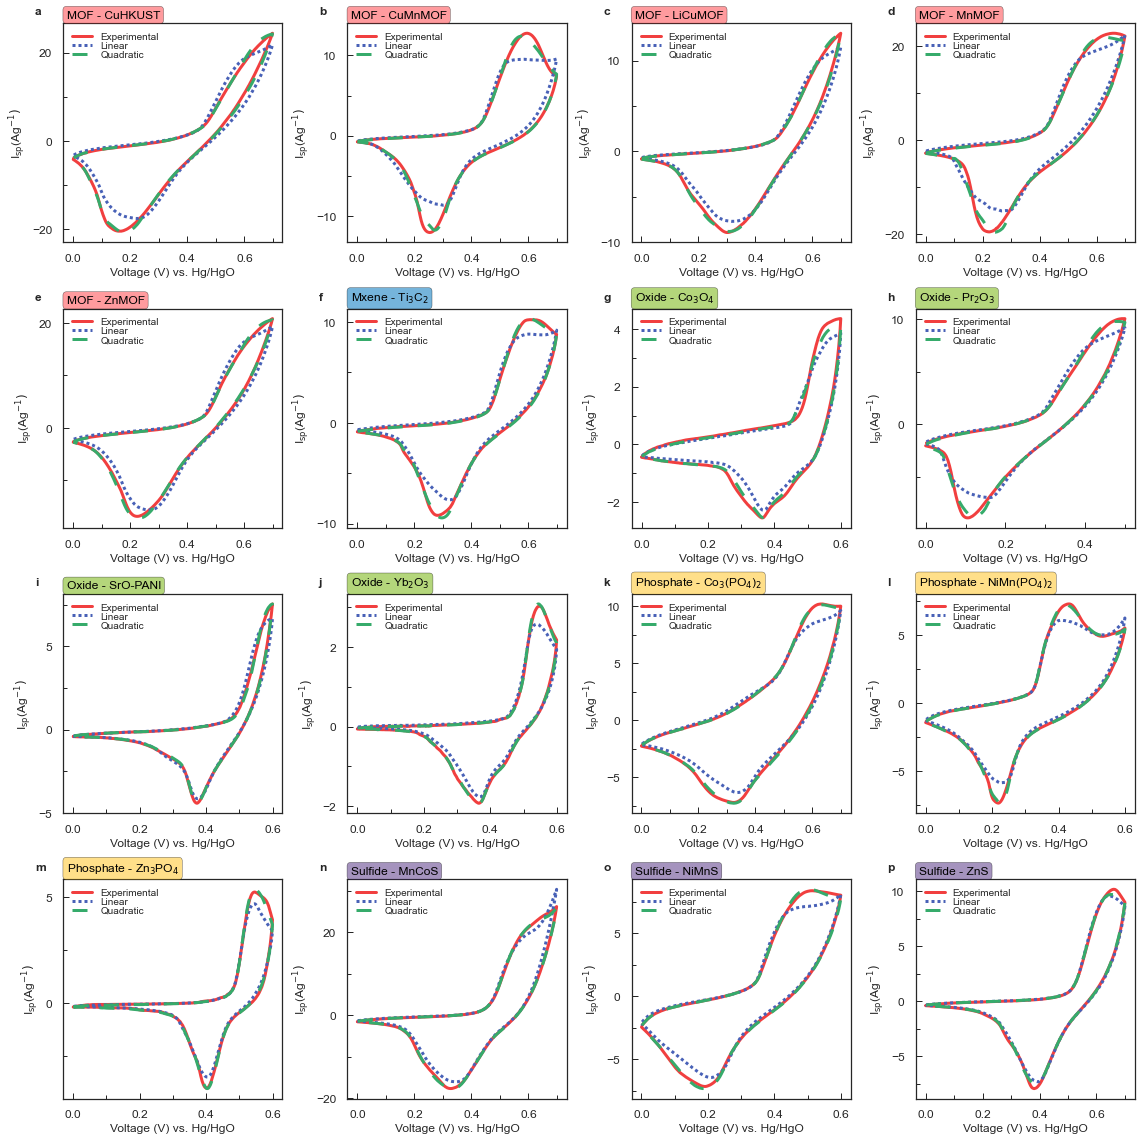

In [142]:
#____Input_______
sr = 20

#____Code: Do not change______
fig = plt.figure(figsize = (16,16), tight_layout = True)
shape = (4,4)
loc = [(i,j) for i in range(shape[0]) for j in range(shape[1])]
loc = iter([(i,j) for i in range(shape[0]) for j in range(shape[1])])

clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

#___Plot____
for j, (ind, group) in enumerate(mat_df.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]
    
    for i, m in enumerate(group['Object']):
        #styl=styl_list[i % 4]
        ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);
        ax0.text(0.015, 1.015, s = m.nameLTX, bbox=dict(facecolor=clrr, edgecolor = 'black', alpha=0.6, boxstyle='round'), color = 'black', horizontalalignment='left', verticalalignment='bottom',transform=ax0.transAxes, )

        ax0.set_box_aspect(1)

        #____Select: Exp, Lin_reg_fit, Quad_reg_fit___
        voltages = m.cv.voltages.filter(regex = str(sr))
        
        
        
        quad = m.cv.quad_total.filter(regex=str(sr))
        lin = m.cv.lin_total.filter(regex=str(sr))
        exp = m.cv.currents.filter(regex=str(sr))
        compare_exp_lin_quad = pd.concat([exp, lin, quad], axis = 1, ignore_index = True)
        compare_exp_lin_quad.index.name = "SR" + str(sr)
        compare_exp_lin_quad.columns = ['Exp Im' + str(sr), 'Linear Im' + str(sr), 'Quadratic Im' + str(sr)]


        #____Call plotter____
        ecp.plotcv(ax0, 
                   voltages, 
                   compare_exp_lin_quad/m.cv.active_mass,  
                   legend = ['Experimental', 'Linear', 'Quadratic'],  
                   cycler=cycler_fit, 
                   legend_dic = legend_style, 
                   marker_dic = {'linewidth':3},
                   ylabel = pm.ltx_str('I', 'specific')
                  );

ecp.plot_modifiers().annotate()




### <font color = '#F14040'><b> Capacitive and Diffusive Capacities</b> </font>

In [119]:
#Find for each material: capacitive capacity, diffusive capacity, total capacity. 

### <font color = '#F14040'><b>Plot Cap and Diffusive - Grid</b> </font>

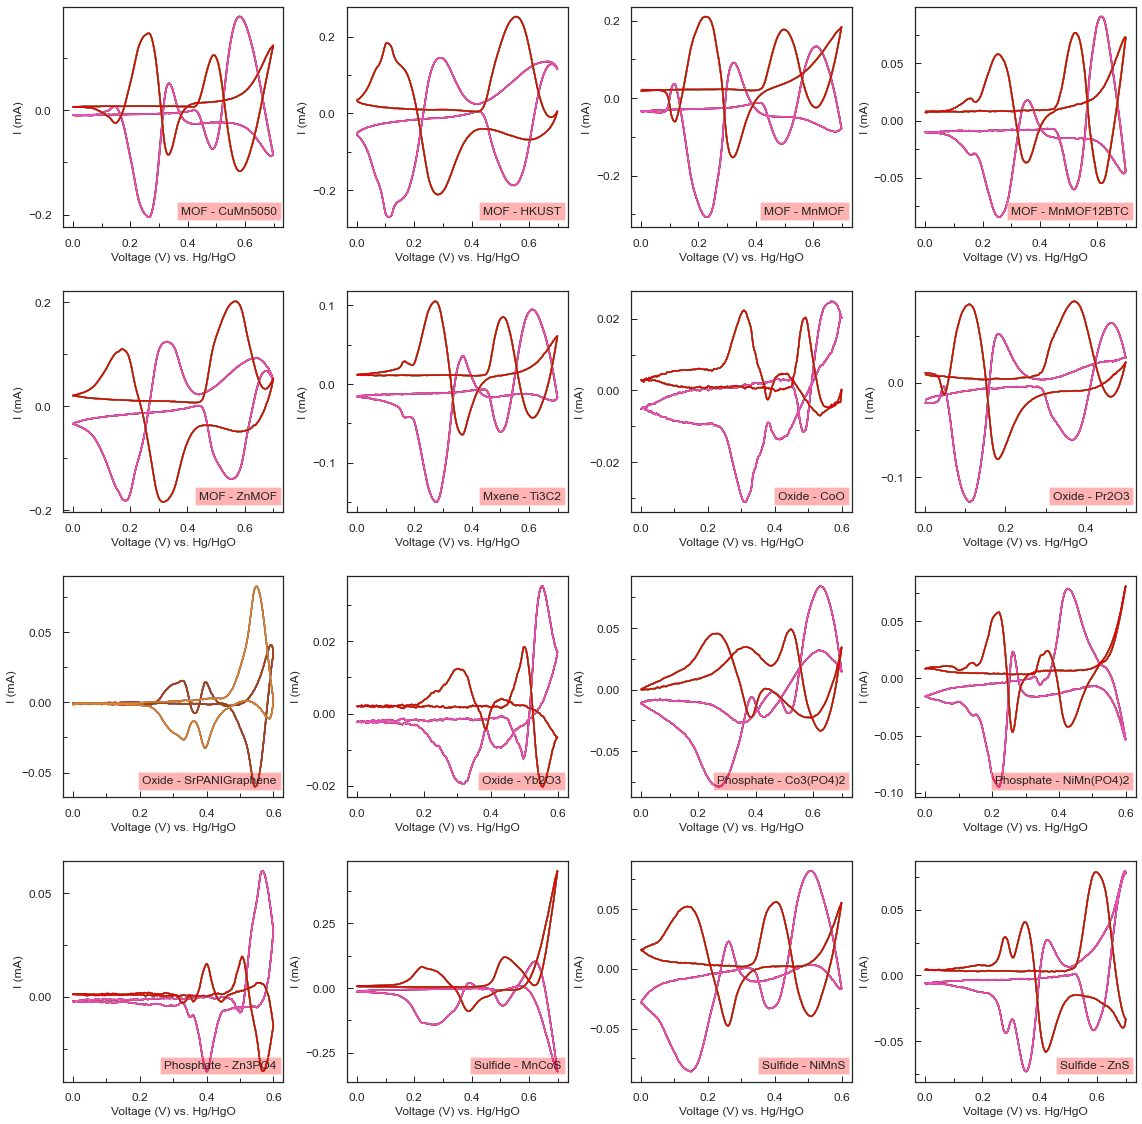

In [996]:
import itertools 

fig = plt.figure(figsize = (16,16), tight_layout = True)

shape = (4,4)

loc = [(i,j) for i in range(shape[0]) for j in range(shape[1])]
cloc = itertools.cycle(loc)

# for i, m in enumerate(st.mats['Object']):
#     ax0 = plt.subplot2grid(shape, loc[i], rowspan=1, colspan=1);
#     ax0.set_box_aspect(1)
    
#     ecp.plotcv(ax0, m.cv.voltages, m.cv.currents,  
#                legend = m.cv.cv_legend,  
#                cycler=cycler, 
#                legend_dic = legend_style, 
#                #marker_dic = marker_style,
#            #**other
#               );
#     #ecp.set_ax_size(10,10, ax = ax0)

#     ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)

    
clrs_list=['k','b','g','r', 'c'] # list of basic colors
styl_list=['-','--','-.',':', 'loosely dotted'] # list of basic linestyles


for j, (ind, group) in enumerate(st.mats.groupby(level=0)):
    clrr = clrs_list[j % 5]

    legend = group.index
    for i, m in enumerate(group['Object']):
        styl=styl_list[i % 4]
        ax0 = plt.subplot2grid(shape, next(cloc), rowspan=1, colspan=1);
        ax0.set_box_aspect(1)
        
        ecp.plotcv(ax0, m.cv.voltages, m.cv.quad_cap['Im20'],  
           #legend = m.cv.cv_legend,  
           #cycler=cycler, 
           #legend_dic = legend_style, 
           #marker_dic = marker_style,
       #**other
          )
        ecp.plotcv(ax0, m.cv.voltages, m.cv.quad_diff['Im20'],  
           #legend = m.cv.cv_legend,  
#           cycler=cycler, 
                   # linestyle = styl,
                   # color = clrr
                
#            legend_dic = legend_style, 
#            marker_dic = marker_style,
       #**other
          )
        ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)
        





### <font color = '#F14040'><b>Plot Residuals </b> </font>

In [ ]:

# #____Code: Do not change______
# fig = plt.figure(figsize = (16,16), tight_layout = True)

# shape = (4,4)
# loc = [(i,j) for i in range(shape[0]) for j in range(shape[1])]


# for i, m in enumerate(mat_df['Object']):
#     ax0 = plt.subplot2grid(shape, loc[i], rowspan=1, colspan=1);
#     ax0.set_box_aspect(1)

#     #____Call plotter____
#     ecp.plotcvresiduals(m.cv.residuals_at)
#     #ecp.set_ax_size(10,10, ax = ax0)

#     ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)
st.mats.iloc[10,0].cv.residuals_at
ecp.plotcvresiduals(mat_df.iloc[10,0].cv.residuals_at)

### <font color = '#F14040'><b>Plot Reg Param </b> </font>

In [ ]:
#____Code: Do not change______
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize = (30,30))

shape = (8,4)
loc = [[i,j] for i in range(0,shape[0]) for j in range(0,shape[1], 3)]

gs = gridspec.GridSpec(8, 5)

for i, m in enumerate(st.mats['Object']):
    #____Location____
    
    offset = [0,1]
    offset = [loc[i][x]+offset[x] for x in range(len(offset))]
    
    #--->>>> Use gridspec <<<<----
    ax0 = fig.add_subplot(gs[loc[i][0], loc[i][1]])
    ax1 = fig.add_subplot(gs[offset[0], offset[1]])
    
    #____Scale data___
    scale_by = {'b3':5,'b1':1,'b2':1}
    legend = [r"$\mathrm{\beta_{1}}$", r"$\mathrm{\beta_{2}}$",r"$\mathrm{\beta_{3}\times}$" + f"{scale_by['b3']}"]

    #____Call plotter____
    ecp.plotreg_param((ax0, ax1), m.cv.voltages.iloc[:,0], m.cv.quad_reg_params.mul(scale_by.values()), legend = legend, legend_dic = dict(ncol = 3, loc = 3, frameon = False) )
    ax1.text(1.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)


plt.subplots_adjust(wspace=0, hspace=0.4)

### <font color = '#F14040'><b>Plot Box Plots </b> </font>

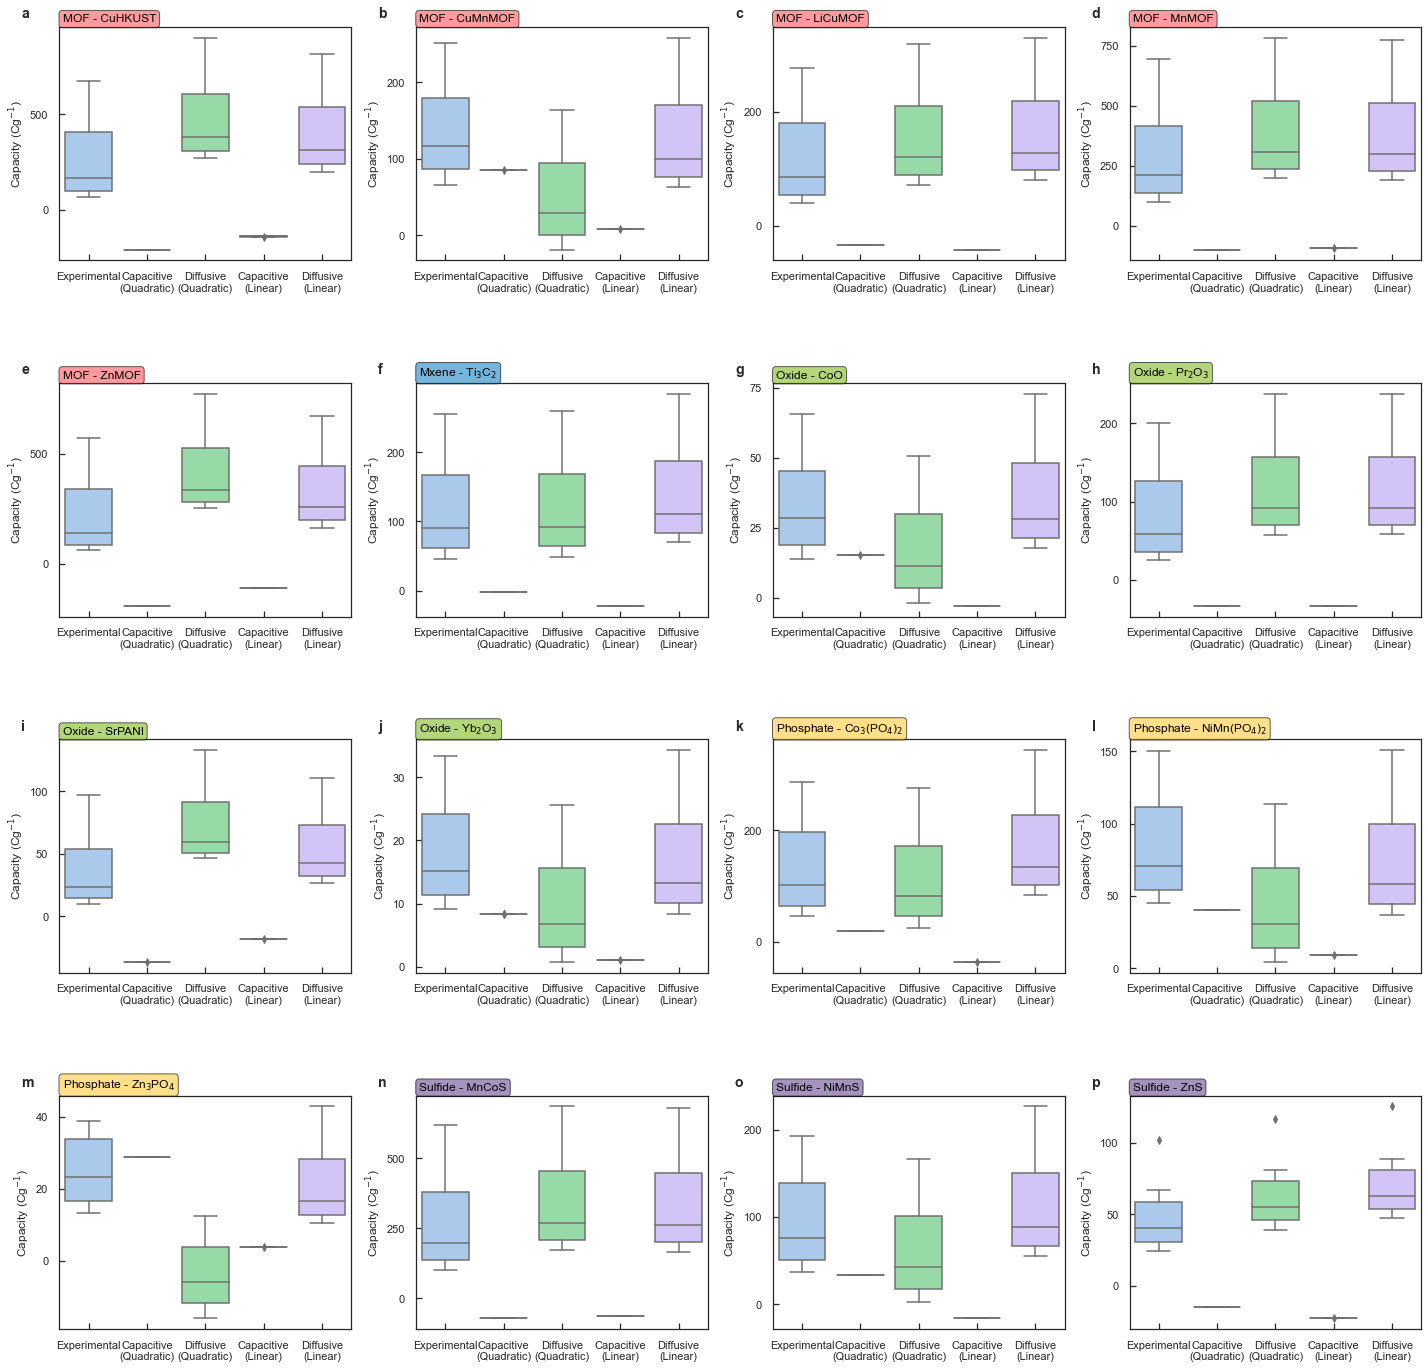

In [103]:
fig, loc, shape = ecp.plot_makers().create_fig(figsize = (20,20), shape = (4,4), order ='row')
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

sns.set_theme(style = "ticks", palette="pastel")


for j, (ind, group) in enumerate(st.mats.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]

    for i, m in enumerate(group['Object']):

        ax0 = plt.subplot2grid(shape, 
                               next(loc), 
                               rowspan=1, colspan=1);

        def find_all_capacities(material, which = 'All', frac = (0,0.5)):
            """
            Wrapper for finding all capacities

            Returns:
                Dataframe with all capacities.
            """
            capacities = pd.DataFrame()
            m = material
            if which.lower() == 'all':

                cap = m.cv.capacity
                quad_cap = m.cv.find_capacity(currents = m.cv.quad_cap, frac = frac)
                lin_cap =  m.cv.find_capacity(currents = m.cv.lin_cap, frac = frac)
                quad_diff = m.cv.find_capacity(currents = m.cv.quad_diff, frac = frac)
                lin_diff =  m.cv.find_capacity(currents = m.cv.lin_diff, frac = frac)

                capacities = pd.concat([cap, quad_cap, quad_diff, lin_cap, lin_diff], axis = 0)
                capacities.index = ['Experimental', 'Capacitive\n(Quadratic)', 'Diffusive\n(Quadratic)','Capacitive\n(Linear)', 'Diffusive\n(Linear)']
                capacities = capacities.T

                capacities_sp = capacities/m.cv.active_mass

                return capacities, capacities_sp

        capacities, capacities_sp = find_all_capacities(m, which = 'All', frac = (0,0.5))
        #______________Plotter_________________

        g = sns.boxplot(data=capacities_sp, ax = ax0)
        g.set(ylabel=r'Capacity (Cg$^{-1}$)')
        g.set_box_aspect(0.8)
        pm.create_tag(g, pos = (0.011, 1.013), name = m.nameLTX, box_clr = clrr, alpha = 0.6, alignment = ('left', 'bottom'))
        g.tick_params(axis = 'both', which = 'both', direction = 'in')
        g.locator_params(axis='y', nbins=4)



    
ecp.plot_modifiers().annotate(size = 14)


## <font color = 'cyan'><b> Plots by Group </b> </font>

#### <font color = 'cyan'><b> Groups and Members </b> </font>

In [ ]:
# Plot each material by the same color. 
# Each material by the same shade. 
# Each reg parameter (if on the same plot) by the same line style.

# Regression parameters for oxides.
groups = list(zip(*mat_df.index))[0]
groups = list(set(groups)) 

for g in groups:
    for i in range(len(mat_df.loc[g])):
        print(mat_df.loc[g].iloc[i,0].name)
    print('-')



#### <font color = 'cyan'><b> Plots by Group - Parameters </b> </font>

In [ ]:
clrs_list

In [ ]:
   

fig = plt.figure(figsize = (10,14))
clrs_list=['k','b','g','r', 'c'] # list of basic colors
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

styl_list=['-','--','-.',':', 'loosely dotted'] # list of basic linestyles

for j, (ind, group) in enumerate(mat_df.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]
    ax0 = plt.subplot2grid((5,2), (j,0), rowspan=1, colspan=1);
    ax1 = plt.subplot2grid((5,2), (j,1), rowspan=1, colspan=1);
    
    legend = [b for (_,b) in group.index]
    for i, m in enumerate(group['Object']):
        styl=styl_list[i % 4]
        
        xlabel = "Regression Parameter (Beta)"
        ylabel = "Voltage (V) vs. Hg/HgO"
        

        ecp.plotreg_param((ax0, ax1), m.cv.voltages.iloc[:,2], m.cv.quad_reg_params.iloc[:,0].to_frame(),
                         marker_dic = dict(color = clrr, ls = styl),
                          
                          xlabel = "",
                          ylabel = "",
                          legend = legend,
                          legend_dic = {'loc': 3, 'ncol':2, 'bbox_to_anchor':[0, 0], 'frameon' : False},
                          annotate = False
                          
                         )
        
        


#### <font color = 'cyan'><b> Plots by Group - Peaks </b> </font>

In [ ]:
#___Plot peaks___Select first peak.
import seaborn as sns
sns.set_theme(style="ticks")

clrs_list=['k','b','g','r', 'c'] # list of basic colors
styl_list=['-','--','-.',':', 'loosely dotted'] # list of basic linestyles

df_peaks = pd.DataFrame()

for j, (ind, group) in enumerate(st.mats.groupby(level=0)):
    clrr = clrs_list[j % 5]

    legend = group.index
    for i, m in enumerate(group['Object']):
        styl=styl_list[i % 4]
        print(m.name)

        if 0 in m.cv.current_peaks.index: #0 indicates the first peak.
            filtered = m.cv.current_peaks.loc[0,:]
            x = np.sqrt(filtered['SR'])
            y = (filtered['peak_heights'])
            df_temp = pd.concat([x,y], axis=1)
            df_temp['Material'] = m.name #Material names are MOF_HKUST etc. For legend we only need HKUST. 
            
            df_temp['Group'] = group.index[0][0]
            df_temp = df_temp.reset_index(drop=True)
            
            df_peaks = (pd.concat([df_peaks, df_temp], axis = 0))
            #___Extract voltages. Not used____
            # volt_row, volt_col = filtered['peaks'], ['Vf'+str(i) for i in filtered['SR']]
            # z = zip(volt_row, volt_col)
            # volt = m.cv.voltages.loc[peak_pos, volt_col]

palette = sns.color_palette(palette = "bright", n_colors = 5, desat = 0.65)
sp = sns.scatterplot(data = df_peaks, x = 'SR', y = 'peak_heights', hue = 'Group', style ='Material', s= 200, alpha =0.8, palette = palette)

#p2 = sns.regplot(data=df_peaks, x='x', y='y', line_kws={'color': 'g'})


#_____________GROUP BY CATEGORY_________
"""
Modifies the above plot to group hue and marker shape. Hues would define groups within which 'marker' styles would define materials. 
"""

def _group_hue_and_style_from_multiindices(ax, multi_indices = None):
    handles, labels = ax.get_legend_handles_labels()
    index_category2 = labels.index('Material') #Find index of the second category (name) in ax labels.

    #____Match groups and materials____
    mat2group_dict = dict([(e[0]+" - "+e[1], e[0]) for e in list((multi_indices))])
    
    #___Connect group and color____
    color_dict = {label: handle.get_facecolor()
                  for handle, label in zip(handles[1:index_category2], labels[1:index_category2])}

    # loop through the items, assign color via the subscale of the item idem
    for handle, label in zip(handles[index_category2 + 1:], labels[index_category2 + 1:]):
        handle.set_color(color_dict[mat2group_dict[label]])

    # create a legend only using the items
    ax.legend(handles[index_category2 + 1:], labels[index_category2 + 1:], title='Material',
              bbox_to_anchor=(0.99, 1.0), fontsize=12, frameon = False)
    return

_group_hue_and_style_from_multiindices(sp.axes,st.mats.index)

plt.tight_layout()
plt.show()


#### <font color = 'cyan'><b> Plots by Group - Capacitive/Diffusive </b> </font>

#### <font color = 'cyan'><b> Plots by Group - Capacitiveness </b> </font>

In [ ]:
#____Input_______

#___________Create Color Palette for Groups___________
group_lengths  = st.mats.groupby(level=0).count().iloc[:,0].tolist()

c = my_colors
pal = []
for i, l in enumerate(group_lengths):
    pal.append([c[i]]*l)

pal = [item for sublist in pal for item in sublist]

palette1 = sns.color_palette(pal)
palette2 = sns.color_palette(pal, desat = 0.3)

p3 = list(zip(palette1, palette2))


#____Code: Do not change______
fig = plt.figure(figsize = (16,16), tight_layout = True)

shape = (4,4)
loc = [(i,j) for i in range(shape[0]) for j in range(shape[1])]


for i, m in enumerate(st.mats['Object']):
    ax0 = plt.subplot2grid(shape, loc[i], rowspan=1, colspan=1);
    ax0.set_box_aspect(1)
    
    #____Select: Compute___
    
    quad_capacitiveness = m.cv.find_capacitiveness(frac= (0, 0.5), model = 'Quadratic').loc[0].tolist()
    lin_capacitiveness = m.cv.find_capacitiveness(frac= (0, 0.5), model = 'Linear').loc[0].tolist()
    
    #____Call plotter____
    ecp.percent_capacitive(ax0, m.cv.srates, quad_capacitiveness, lin_capacitiveness, palette = p3[i])
    #ecp.percent_capacitive(ax0, )


    ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)


In [ ]:
#____Input_______

#___________Create Color Palette for Groups___________
group_lengths  = st.mats.groupby(level=0).count().iloc[:,0].tolist()

c = my_colors
pal = []
for i, l in enumerate(group_lengths):
    pal.append([c[i]]*l)

pal = [item for sublist in pal for item in sublist]

palette1 = sns.color_palette(pal)
palette2 = sns.color_palette(pal, desat = 0.3)

p3 = list(zip(palette1, palette2))
#display(palette1)

#____Create cycler____
from cycler import cycler
cc = (cycler(color=list('rgb')) *
      cycler(linestyle=['-', '--', '-.'])*
      cycler(marker = ['o'])
     
     )


#____Code: Do not change______
#fig, ax0 = plt.figure(figsize = (4,4), tight_layout = True)
fig, ax0 = plt.subplots()
ax0.set_box_aspect(1)
ax0.set_prop_cycle(cc)

for i, (c, m) in enumerate(zip(cc, st.mats['Object'])):
    print(c)


#for i, m in enumerate(st.mats['Object']):
    
    
    #____Select: Compute____
    
    quad_capacitiveness = m.cv.find_capacitiveness(frac= (0, 0.5), model = 'Quadratic').loc[0].tolist()
    lin_capacitiveness = m.cv.find_capacitiveness(frac= (0, 0.5), model = 'Linear').loc[0].tolist()
    
    #____Call plotter____
    #sns.scatterplot(x = m.cv.srates, y= quad_capacitiveness)
    plt.plot(m.cv.srates, quad_capacitiveness)


    #ax0.text(0.97, 0.05, s = m.name, bbox=dict(facecolor='red', alpha=0.3), horizontalalignment='right', verticalalignment='bottom',transform=ax0.transAxes)

#### <font color = 'cyan'><b> Plotly - 2D Plots for Comparison </b> </font>

In [ ]:
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import iplot

# dict for the dataframes and their names
#dfs = {"df1" : df1, "df2": df2, "df3" : df3, "df4" : df4, "df5" : df5}

# plot the data
fig = go.Figure()
fig.update_layout(
    autosize=False,
    width=800,
    height=800,)
for m in st.mats['Object']:
    fig = fig.add_trace(go.Scatter(x = m.cv.voltages.iloc[:,0],
                                   y = m.cv.currents.iloc[:,0], 
                                   name = m.name))
fig.show()

## <font color = '#CCFFFF'><b>Selected - (Manuscript) </b> </font>

### <font color = '#CCFFFF'><b>Selected - CV and Peaks </b> </font>

In [143]:
#Select the materials for manuscript
select = st.study_subset(index = [1,5,9,12,14], group_first = False, attribute = 'name')
display(select)

['MOF - CuMnMOF',
 'Mxene - Ti3C2',
 'Oxide - Yb2O3',
 'Phosphate - Zn3PO4',
 'Sulfide - NiMnS']

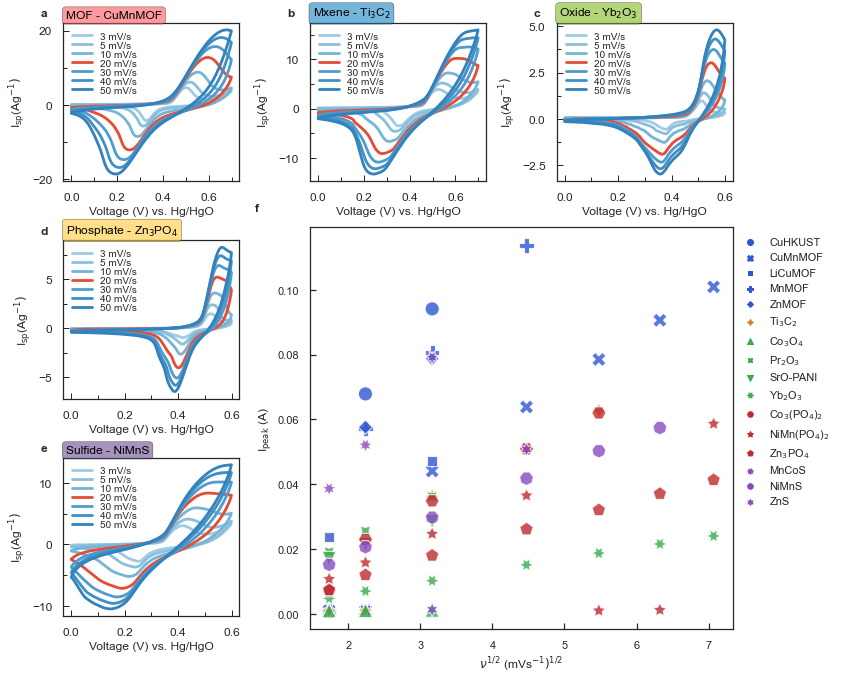

In [144]:
#_________________________
figsize = (12,12)
fig = plt.figure(figsize = figsize
                 #, tight_layout = True
                )
shape = (3, 3)
order = [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0), (1, 1)] #Enter order in which figures ought to appear.
loc = iter(order)

#______Plot Settings______
sr = 20
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

#____Plot Row 1_____
def plot_selected_cvs():
    for j, (ind, group) in enumerate(mat_df.groupby(level=0)):
        k = 2*j
        clrr = clrs_list[j % 5]

        for i, m in enumerate(group['Object']):

            if m.name in select:
                #styl=styl_list[i % 4]
                ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);
                pm.create_tag(ax0, pos = (0.015, 1.014), name = m.nameLTX, box_clr = clrr, alpha = 0.6, alignment = ('left', 'bottom'))

                ax0.set_box_aspect(0.9)

                ecp.plotcv(ax0, m.cv.voltages, 
                           m.cv.currents/m.cv.active_mass,  
                           legend = m.cv.cv_legend,  
                           ylabel = 'I$_\mathrm{sp}$(Ag$^{-1})$',
                           cycler=cycler_cv, 
                           legend_dic = legend_style, 
                          );
def plot_all_peaks():
    import seaborn as sns
    sns.set_theme(style="ticks")


    #_____Create Plot__________
    ax1 = plt.subplot2grid(shape, next(loc), rowspan=2, colspan=2);
    ax1.set_box_aspect(0.95)

    palette = sns.color_palette(palette = "bright", n_colors = 5, desat = 0.65)
    sp = sns.scatterplot(data = df_peaks, x = 'SR_root', y = 'peak_heights', hue = 'Group', style ='Material', s= 200, alpha =0.8, palette = palette, ax = ax1,
                        )
    
    
    sp.tick_params(axis = 'both', which = 'both', direction = 'in')
    sp.set( xlabel = r'$\nu^{1/2}$ (mVs$^{-1})^{1/2}$', ylabel = "I$_\mathrm{peak}$ (A)")

    #_____________BIND LEGEND BY CATEGORY_________
    mapping_dic = dict([(e[1], e[0]) for e in list((st.mats.index))])
    QR().group_hue_and_style_from_dict(sp.axes, first_category = 'Group', second_category = 'Material', mapping_dic = mapping_dic)
    
    
    #_________Turn legend to latex________________
    def legend_to_latex():
        handles, labels = sp.get_legend_handles_labels()


        #___Remove first legend category______
        handles = handles[7:]
        labels = labels[7:]
        
        #___And latexify____
        labels = [QR().latexify(l) for l in labels]

        sp.legend(handles, labels, labelspacing = 0.5, frameon = False,  bbox_to_anchor=(0.99, 1.0))
        return
    legend_to_latex()


plot_selected_cvs()
plot_all_peaks()
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0)
ecp.plot_modifiers().annotate(fig, labels = list('abcdef'))

### <font color = '#CCFFFF'><b>Selected - Fit and Residues </b> </font>

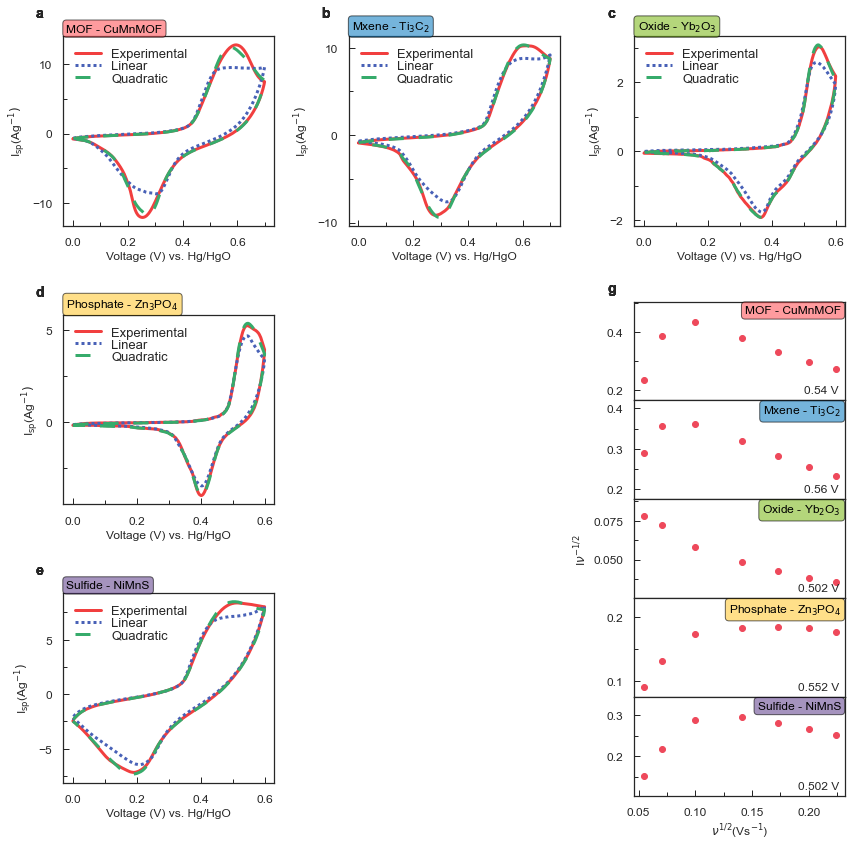

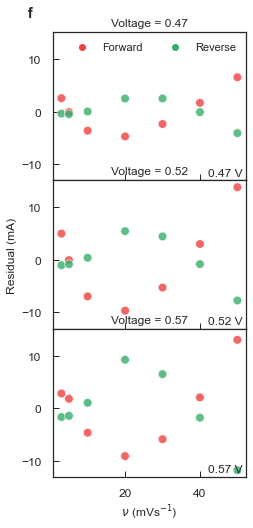

In [145]:
order = [(0, 0), (0, 1), (0, 2), (1, 0), (2, 0), (1, 2)]
fig, loc, shape = ecp.plot_makers().create_fig(figsize = (12,12), shape = (3,3), order = order)
legend_style_fit = dict(frameon = False, loc = 2, prop = {'size':13}, ncol = 1)
#______Plot Settings______
sr = 20
clrs_list, _, _ = select_colors_lines_markers(number = 5, palette = 'Category_1')

#____Plot Row 1_____
def plot_fits():
    for j, (ind, group) in enumerate(mat_df.groupby(level=0)):
        k = 2*j
        clrr = clrs_list[j % 5]

        for i, m in enumerate(group['Object']):
            if m.name in select:

                #styl=styl_list[i % 4]
                ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);
                ax0.text(0.015, 1.014, s = m.nameLTX, bbox=dict(facecolor=clrr, edgecolor = 'black', alpha=0.6, boxstyle='round'), color = 'black', horizontalalignment='left', verticalalignment='bottom',transform=ax0.transAxes, )

                ax0.set_box_aspect(0.9)

                def cv_fits(m, sr):
                    voltages = m.cv.voltages.filter(regex = str(sr))

                    quad = m.cv.quad_total.filter(regex=str(sr))
                    lin = m.cv.lin_total.filter(regex=str(sr))
                    exp = m.cv.currents.filter(regex=str(sr))

                    compare_exp_lin_quad = pd.concat([exp, lin, quad], axis = 1)

                    compare_exp_lin_quad.index.name = "SR" + str(sr)
                    compare_exp_lin_quad.columns = ['Exp Im' + str(sr), 'Linear Im' + str(sr), 'Quadratic Im' + str(sr)]

                    return voltages, compare_exp_lin_quad

                voltages, compare_exp_lin_quad = cv_fits(m, sr)

                ecp.plotcv(ax0, 
                           voltages, 
                           compare_exp_lin_quad/m.cv.active_mass, 
                           
                           legend = ['Experimental', 'Linear', 'Quadratic'],  
                           ylabel = pm.ltx_str('I', 'specific'),
                           cycler=cycler_fit, legend_dic = legend_style_fit, marker_dic = {'linewidth':3}
                          );
    return
def plot_nonlinearity():
    import mpl_toolkits.axes_grid1.axes_size as Size
    from mpl_toolkits.axes_grid1 import Divider

    ax0 = plt.subplot2grid(shape, next(loc), rowspan=2, colspan=1);
    axs = pm.ax_divider(ax0, divisions = 5)

    vindices = [270,280,250,275,250]
    ypad = [0.34,0.45,0.25,0.1,0.35] #Padding for plots to avoid overlap with annotations

    for j, (v, (ind, group)) in enumerate(zip(vindices, mat_df.groupby(level=0))):
        k = 2*j
        clrr = clrs_list[j % 5]

        for i, m in enumerate(group['Object']):
            if m.name in select:
                pm.create_tag(axs[j], name = m.nameLTX, box_clr = clrr, alpha = 0.6,
                             alignment = ('right', 'top'),
                             pos = (0.98,0.96))
                ecp.plotcv(axs[j], 
                           np.sqrt(m.cv.srates)*10**(-3/2), 
                           m.cv.currents_ibysqrtv.iloc[v,:]/10**(-3/2),
                           plot = 'scatter',
                           #cycler=cycler_fit, 
                           marker_dic = {'color': '#ee495b'},
                           legend_dic = legend_style, 
                           #xlabel = pm.ltx_str('sr', 'sqrt'), 
                           xlabel = r'$\nu^{1/2}$(Vs$^{-1}$)', 

                           ylabel = r'I$\nu^{-1/2}$'
                          )
                axs[j].set_ymargin(ypad[j])

                if j == 3: axs[j].set_ylim(0.075,0.23) #manually set limits for one graph
                #if j == 2: axs[j].set_ylim(0.27,0.32) #manually set limits for one graph

                if j < 4: axs[j].get_xaxis().set_visible(False)
                if j != 2: axs[j].set_ylabel("")

                
                axs[j].text(0.97, 0.05, str(round(m.cv.voltages.iloc[v,0],3)) + " V", 
                            horizontalalignment='right', verticalalignment='bottom', transform=axs[j].transAxes)

                #pm.scientific_labels(axs[j], pos = 0.175, axis = 'y')
                axs[j].locator_params(axis='y', nbins=3)

                pm.annotate(fig, labels = list('abcdeg'), loc = (-0.13, 1.1), size = 14)
    return
def plot_residuals(m):
    sns.set_theme(style="ticks")

    palette = sns.color_palette(palette = "bright", n_colors = 5, desat = 0.75)
    at_voltages = [0.47,0.52, 0.57]
    m.cv.find_residuals_at(which = 'lin', sr = 20, at_voltages = at_voltages)

    h, w = 2 *(4.62/3), 2.2*(2.13)
    h, w = 2*(1.25), 2*(1.87)

    asp = w/h
    ecp.plotcvresiduals(m.cv.residuals_at, **{'aspect' : asp, 'height':h, 'legend_out':False, 
                                              #'margin_titles': True
                                             })
    
    g = plt.gcf()
    for i, ax in enumerate(g.axes):
        #if i == 1: ax.set_ymargin(0.6)

        ax.text(0.98,0.05,str(at_voltages[i]) + " V", horizontalalignment='right', verticalalignment='center', transform=ax.transAxes)    
 
    return

plot_fits()
plot_nonlinearity()            
plt.show()

plot_residuals(st.mats.iloc[0,0])
ecp.plot_modifiers().annotate(plt.gcf(), labels = list('f'), loc = (-0.13, 1.1), size = 14)

### <font color = '#CCFFFF'><b>Selected - Ragone </b> </font>

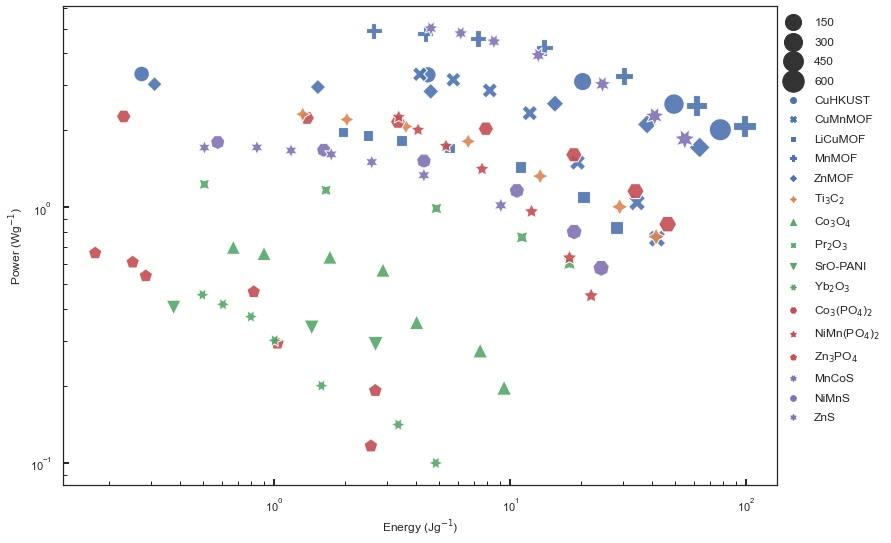

In [146]:
sns.set_theme(style = "ticks")

group = [i[0] for i in st.mats.index]
material = [i[1] for i in st.mats.index]

g = sns.scatterplot(data = df_ragone, x = 'Energy (J/g)', y = 'Power (W/g)', hue = 'Group', style = 'Material', size = 'Capacity (C/g)', alpha = 0.9,
                   sizes = (200,500)
               )
g.set(xscale="log", yscale = "log")
g.set_xlabel(r"Energy (Jg$^{-1}$)")
g.set_ylabel(r"Power (Wg$^{-1}$)")
g.tick_params(axis = 'both', which = 'both', direction = 'in')

#__________________________________________________
def bind_legend_categories(ax, legend2cat = None, bind = None, mapping = None):
    """
    Mapping is a list of tuples relating how the elements of each category interlock. 
    """
    def list_1D_to_ord_dict(source_list = None, categories = None, indices = None, by_index = False):
        """
        Usage
            Break a list like: ['Name', 'a', 'b', 'c', 'Address', 1,2,3, 'Age', 2,4,5]
            at positions specified by Categories e.g. ['Name', 'Address', 'Age'] or by indices = [0,4,8] if by_indes = True.
            
            And return a dictionarly like: {'Name': ['a', 'b', 'c'], 'Address': [1,2,3], 'Age': [2,4,5]}

            if by_index = False:
                Divide source_list by categories and turn to dictionary.

            if by_index = True:
                Use indices to divide source_list and turn to dictionary using categories as keys.
                For this indices and categories must be in same order. 

        Args:
            source_list = list to categorize.
            categories = categories to follow
            by_loc = Use categories as name or as indices.
            
        Example:
            l = ['cata', 'b', 'c', 'catd', 'e', 'f', 'g', 'cath', 'i', 'j', 'k', 'catl', 'm']
            a = [0,3,7,11]

            d = list_1D_to_dict(source_list = l, categories = ['A', 'D', 'H', 'L'], indices = [0,3,7,11], by_index = True)
            d
        """
        import itertools
        from collections import OrderedDict


        cat_it = iter(categories)

        out = OrderedDict()
        key = None
        if by_index ==False:
            for item in source_list:
                if item in categories:
                    out[item] = []
                    key = item
                else:
                    out[key].append(item) 


        else:
            b = indices[1:] + indices[:1]
            b[-1] = len(source_list)

            tups = list(zip(indices,b))

            for tup in tups:
                out[next(cat_it)] = source_list[slice(*tup)][1:]
        return out
    
    def list_1D_to_dict(source_list = None, categories = None, indices = None, by_index = False):
        """
        Usage
            Break a list like: ['Name', 'a', 'b', 'c', 'Address', 1,2,3, 'Age', 2,4,5]
            at positions specified by Categories e.g. ['Name', 'Address', 'Age'] or by indices = [0,4,8] if by_indes = True.
            
            And return a dictionarly like: {'Name': ['a', 'b', 'c'], 'Address': [1,2,3], 'Age': [2,4,5]}

            if by_index = False:
                Divide source_list by categories and turn to dictionary.

            if by_index = True:
                Use indices to divide source_list and turn to dictionary using categories as keys.
                For this indices and categories must be in same order. 

        Args:
            source_list = list to categorize.
            categories = categories to follow
            by_loc = Use categories as name or as indices.
            
        Example:
            l = ['cata', 'b', 'c', 'catd', 'e', 'f', 'g', 'cath', 'i', 'j', 'k', 'catl', 'm']
            a = [0,3,7,11]

            d = list_1D_to_dict(source_list = l, categories = ['A', 'D', 'H', 'L'], indices = [0,3,7,11], by_index = True)
            d
        """
        import itertools

        cat_it = iter(categories)

        out = {}
        key = None
        if by_index ==False:
            for item in source_list:
                if item in categories:
                    out[item] = []
                    key = item
                else:
                    out[key].append(item) 


        else:
            b = indices[1:] + indices[:1]
            b[-1] = len(source_list)

            tups = list(zip(indices,b))

            for tup in tups:
                out[next(cat_it)] = source_list[slice(*tup)][1:]
        return out
    categories = legend2cat.keys()
    cat1, cat2 = bind[0], bind[1] #Map cat1 on to elements of cat2. There will be no cat1 at the end.

    handles, labels = ax.get_legend_handles_labels()
    han_lab_l = list(zip(labels,handles))
    
    #____________________________
    #Split list into dictionary
    import itertools

    cat_it = iter(categories)

    out = {}
    key = None
    
    for (item, h) in han_lab_l:
        if item in categories:
            out[item] = []
            key = item
        else:
            out[key].append((item, h))        
    #___________________________
  

    
    #_____Bind color_____
    if legend2cat[cat1].lower() == 'color':
        color_dict = {label: handle.get_facecolor()
                      for label, handle in out[cat1]}

        
        for label, handle in out[cat1]: #Take each member of the group (cat1)
            color = handle.get_facecolor()
            
            for l, h in out[cat2]: #Now move through materials (cat2)
                if l in mapping[label]:
                    h.set_color(color)
    
        out.pop(cat1)
        leg_list = (list(out.values()))
        leg_list = [item for sublist in leg_list for item in sublist]
        labels, handles = zip(*leg_list)
        labels, handles = list(labels), list(handles)
        
        
        ax.legend(handles, labels, 
                  #title=second_category,
                  bbox_to_anchor=(0.99, 1.0), fontsize=12, frameon = False, labelspacing = 0.95)
        ax.tick_params(width=2, length=6)
        #ax.legend(labelspacing=2)
    
    #________
    
    
    return 

#____mapping dictionary for binding legend categories_____
d = {}
for grp, _ in list(st.mats.index):
    d[grp] =[]
    for grp2, mat in list(st.mats.index):
        if grp2 == grp:
            d[grp].append(mat)
#_________________________________________________________       
bind_legend_categories(g, legend2cat = {'Group':'Color', 'Material':'Style', 'Capacity (C/g)':'Size'}, 
                       bind = ['Group', 'Material'],
                       mapping = d)
    
#_________Turn legend to latex________________
def legend_to_latex(ax):
    """
    Get the names out of the dictionary
    """
    handles, labels = ax.get_legend_handles_labels()

    labels = [QR().latexify(l) if not l.isnumeric() else l for l in labels ]
    

    #___Remove first legend category______
    handles = handles[7:]
    labels = labels[7:]
    handles.pop(4)
    labels.pop(4)

    ax.legend(handles, labels, labelspacing = 0.75, frameon = False,  bbox_to_anchor=(0.99, 1.0), prop = {'size' : 12})
    return




legend_to_latex(g)



### <font color = '#CCFFFF'><b>Selected - Capacitive/Diffusive <font color = '#EE3333'> [Deprecate] </font> </b> </font>

Capacity     Power    Energy Capacitiveness  \
Group     Material                                                  
MOF       CuHKUST     3.354703  0.010064  0.388128       0.271894   
          CuMnMOF     1.257518  0.003773  0.208960       0.232638   
          LiCuMOF     1.387889  0.004164  0.140831       0.252063   
          MnMOF       3.465007  0.010395  0.491225       0.282601   
          ZnMOF       2.858793  0.008576  0.317109       0.268416   
...                        ...       ...       ...            ...   
Phosphate NiMn(PO4)2       NaN       NaN       NaN            NaN   
          Zn3PO4           NaN       NaN       NaN            NaN   
Sulfide   MnCoS            NaN       NaN       NaN            NaN   
          NiMnS            NaN       NaN       NaN            NaN   
          ZnS         0.122427  0.008570  0.002528       0.146379   

                      RMSE Linear  RMSE Quadratic  SR  RMSE Ratio  RMSE Diff  
Group     Material                                                            
MOF       CuHKUST        0.004100        0.001688   3    0.411753   0.002412  
          CuMnMOF        0.002308        0.000979   3    0.424215   0.001329  
          LiCuMOF        0.001625        0.000632   3    0.388629   0.000994  
          MnMOF          0.003848        0.001837   3    0.477281   0.002011  
          ZnMOF          0.003322        0.001460   3    0.439625   0.001861  
...                           ...             ...  ..         ...        ...  
Phosphate NiMn(PO4)2          NaN             NaN  70         NaN        NaN  
          Zn3PO4              NaN             NaN  70         NaN        NaN  
Sulfide   MnCoS               NaN             NaN  70         NaN        NaN  
          NiMnS               NaN             NaN  70         NaN        NaN  
          ZnS            0.002569        0.000594  70    0.231103   0.001975  

[144 rows x 9 columns]

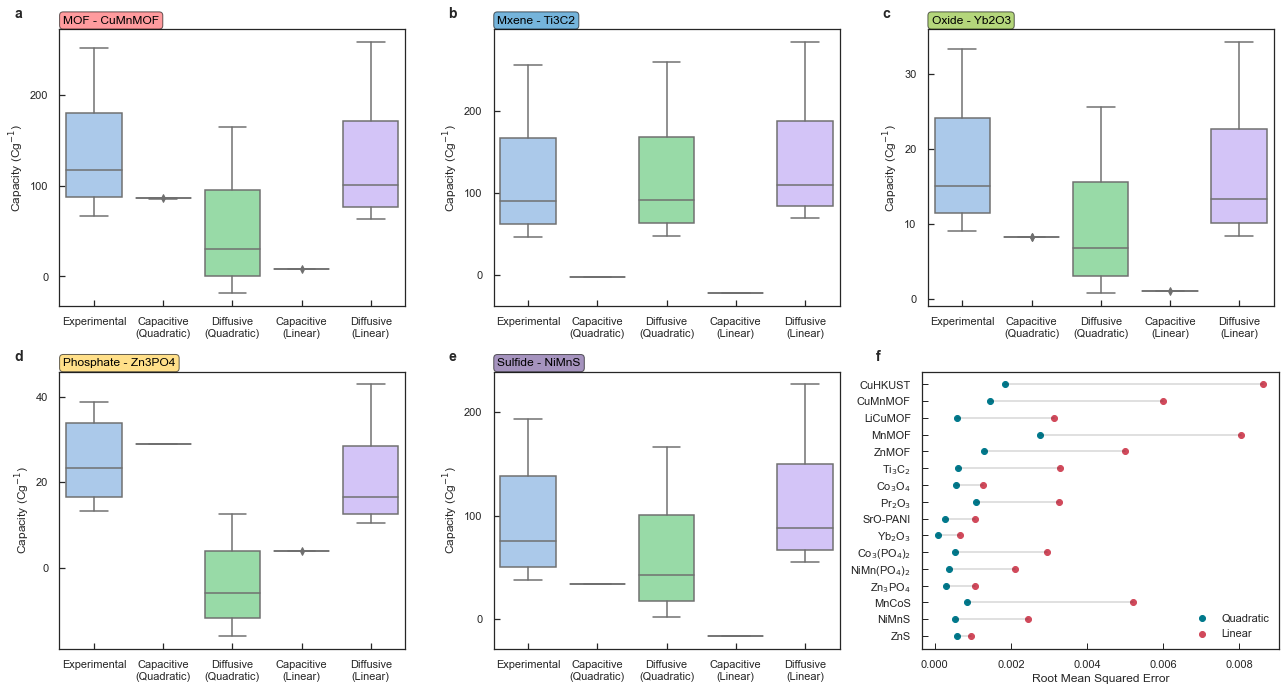

In [147]:
df_summary.copy()

order = [(0,0),(0,1),(0,2),(1,0),(1,1), (1,2)]
fig, loc, shape = ecp.plot_makers().create_fig(figsize = (18,14), shape = (3,3), order =order)
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

sns.set_theme(style = "ticks", palette="pastel")


for j, (ind, group) in enumerate(st.mats.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]

    for i, m in enumerate(group['Object']):
        if m.name in select:


            ax0 = plt.subplot2grid(shape, 
                                   next(loc), 
                                   rowspan=1, colspan=1);

            def find_all_capacities(material, which = 'All', frac = (0,0.5)):
                """
                Wrapper for finding all capacities

                Returns:
                    Dataframe with all capacities.
                """
                capacities = pd.DataFrame()
                m = material
                if which.lower() == 'all':

                    cap = m.cv.capacity
                    quad_cap = m.cv.find_capacity(currents = m.cv.quad_cap, frac = frac)
                    lin_cap =  m.cv.find_capacity(currents = m.cv.lin_cap, frac = frac)
                    quad_diff = m.cv.find_capacity(currents = m.cv.quad_diff, frac = frac)
                    lin_diff =  m.cv.find_capacity(currents = m.cv.lin_diff, frac = frac)

                    capacities = pd.concat([cap, quad_cap, quad_diff, lin_cap, lin_diff], axis = 0)
                    capacities.index = ['Experimental', 'Capacitive\n(Quadratic)', 'Diffusive\n(Quadratic)','Capacitive\n(Linear)', 'Diffusive\n(Linear)']
                    capacities = capacities.T
                    
                    capacities_sp = capacities/m.cv.active_mass

                    return capacities, capacities_sp

            capacities, capacities_sp = find_all_capacities(m, which = 'All', frac = (0,0.5))
            #______________Plotter_________________




            g = sns.boxplot(data=capacities_sp, ax = ax0)
            g.set(ylabel=r'Capacity (Cg$^{-1}$)')
            g.set_box_aspect(0.8)
            pm.create_tag(g, pos = (0.011, 1.013), name = m.name, box_clr = clrr, alpha = 0.6, alignment = ('left', 'bottom'))
            g.tick_params(axis = 'both', which = 'both', direction = 'in')
            g.locator_params(axis='y', nbins=4)
            #plt.xticks(rotation=20, 
                       #ha='right')




#_____RMSE___________


df_cap_pow_en["RMSE Ratio"] = df_cap_pow_en['RMSE Quadratic']/df_cap_pow_en['RMSE Linear']
filt = (df_cap_pow_en['SR']==20)

data = df_cap_pow_en[filt][['RMSE Quadratic', 'RMSE Linear']]
y = list(df_cap_pow_en[filt].index.get_level_values('Material'))

rmsequad = df_cap_pow_en[filt]['RMSE Quadratic']
rmselin = df_cap_pow_en[filt]['RMSE Linear']

rmse_diff = rmselin - rmsequad

#_________Plotter___________
sns.set_theme(style = "ticks", palette="bright")
ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);

for rq, rl, m in zip(reversed(rmsequad), reversed(rmselin) , reversed(y)):
    m = QR().latexify(m)
    
    #display(m)
    ax0.scatter(x = rq, y = m, color = '#00798c')
    ax0.scatter(x = rl, y = m, color = '#d1495b')
    ax0.plot( [rq,rl], [m,m], color = '#33333333')
    ax0.legend(['Quadratic', 'Linear'], frameon = False)
    ax0.set_xlabel("Root Mean Squared Error")
    ax0.tick_params(axis='both', which = 'major', direction = 'in', length = 6, width = 1)
    
ecp.plot_modifiers().annotate(size = 14)

display(df_cap_pow_en)

### <font color = '#CCFFFF'><b>Selected - Capacitive/Diffusive (sorted w.r.t some variable) </b> </font>

In [148]:
df_summary

Capacity     Power    Energy Capacitiveness  \
Group     Material                                                  
MOF       CuHKUST     3.354703  0.010064  0.388128       0.271894   
          CuMnMOF     1.257518  0.003773  0.208960       0.232638   
          LiCuMOF     1.387889  0.004164  0.140831       0.252063   
          MnMOF       3.465007  0.010395  0.491225       0.282601   
          ZnMOF       2.858793  0.008576  0.317109       0.268416   
...                        ...       ...       ...            ...   
Phosphate NiMn(PO4)2       NaN       NaN       NaN            NaN   
          Zn3PO4           NaN       NaN       NaN            NaN   
Sulfide   MnCoS            NaN       NaN       NaN            NaN   
          NiMnS            NaN       NaN       NaN            NaN   
          ZnS         0.122427  0.008570  0.002528       0.146379   

                      RMSE Linear  RMSE Quadratic  SR  RMSE Ratio  RMSE Diff  \
Group     Material                                                             
MOF       CuHKUST        0.004100        0.001688   3    0.411753   0.002412   
          CuMnMOF        0.002308        0.000979   3    0.424215   0.001329   
          LiCuMOF        0.001625        0.000632   3    0.388629   0.000994   
          MnMOF          0.003848        0.001837   3    0.477281   0.002011   
          ZnMOF          0.003322        0.001460   3    0.439625   0.001861   
...                           ...             ...  ..         ...        ...   
Phosphate NiMn(PO4)2          NaN             NaN  70         NaN        NaN   
          Zn3PO4              NaN             NaN  70         NaN        NaN   
Sulfide   MnCoS               NaN             NaN  70         NaN        NaN   
          NiMnS               NaN             NaN  70         NaN        NaN   
          ZnS            0.002569        0.000594  70    0.231103   0.001975   

                       SR_root  peak_heights  peaks  
Group     Material                                   
MOF       CuHKUST     1.732051      0.001135  861.0  
          CuMnMOF     1.732051      0.001075  863.0  
          LiCuMOF     1.732051      0.023595  999.0  
          MnMOF       1.732051      0.001067  781.0  
          ZnMOF       1.732051      0.001049  869.0  
...                        ...           ...    ...  
Phosphate NiMn(PO4)2       NaN           NaN    NaN  
          Zn3PO4           NaN           NaN    NaN  
Sulfide   MnCoS            NaN           NaN    NaN  
          NiMnS            NaN           NaN    NaN  
          ZnS              NaN           NaN    NaN  

[144 rows x 12 columns]

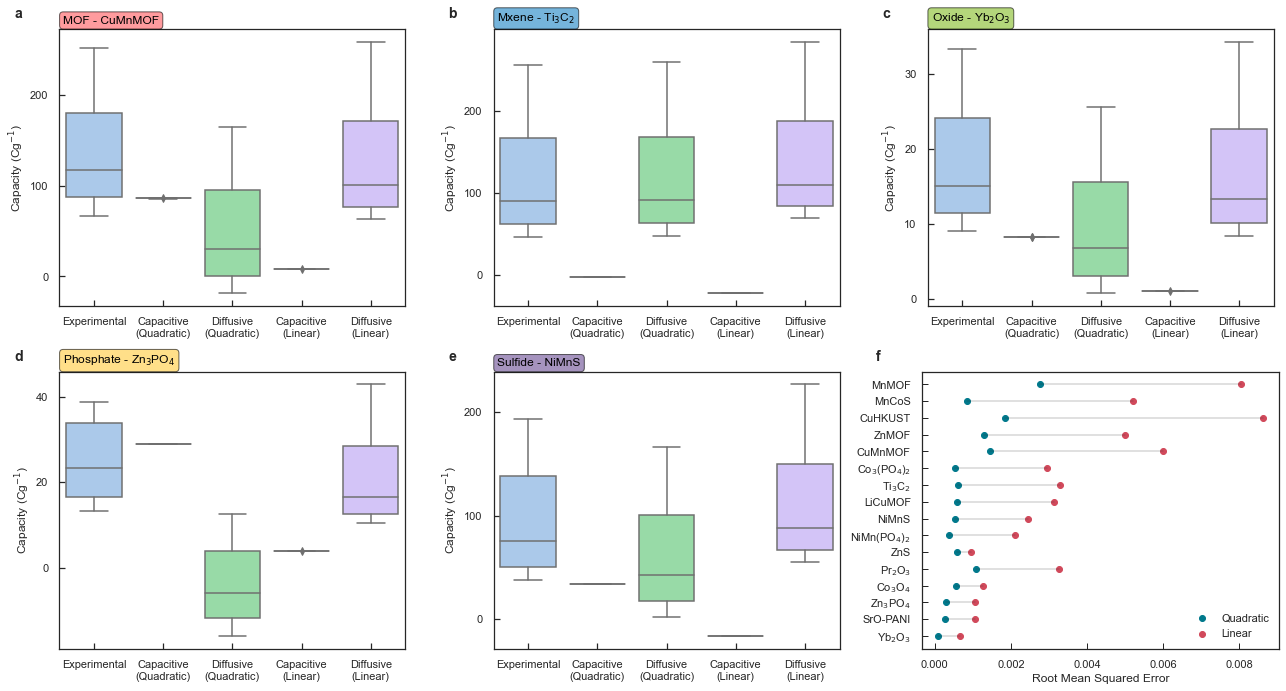

In [149]:

order = [(0,0),(0,1),(0,2),(1,0),(1,1), (1,2)]
fig, loc, shape = ecp.plot_makers().create_fig(figsize = (18,14), shape = (3,3), order =order)
clrs_list, _, _ = select_colors_lines_markers(palette = 'Category_1')

sns.set_theme(style = "ticks", palette="pastel")


for j, (ind, group) in enumerate(st.mats.groupby(level=0)):
    k = 2*j
    clrr = clrs_list[j % 5]

    for i, m in enumerate(group['Object']):
        if m.name in select:


            ax0 = plt.subplot2grid(shape, 
                                   next(loc), 
                                   rowspan=1, colspan=1);

            def find_all_capacities(material, which = 'All', frac = (0,0.5)):
                """
                Wrapper for finding all capacities

                Returns:
                    Dataframe with all capacities.
                """
                capacities = pd.DataFrame()
                m = material
                if which.lower() == 'all':

                    cap = m.cv.capacity
                    quad_cap = m.cv.find_capacity(currents = m.cv.quad_cap, frac = frac)
                    lin_cap =  m.cv.find_capacity(currents = m.cv.lin_cap, frac = frac)
                    quad_diff = m.cv.find_capacity(currents = m.cv.quad_diff, frac = frac)
                    lin_diff =  m.cv.find_capacity(currents = m.cv.lin_diff, frac = frac)

                    capacities = pd.concat([cap, quad_cap, quad_diff, lin_cap, lin_diff], axis = 0)
                    capacities.index = ['Experimental', 'Capacitive\n(Quadratic)', 'Diffusive\n(Quadratic)','Capacitive\n(Linear)', 'Diffusive\n(Linear)']
                    capacities = capacities.T
                    
                    capacities_sp = capacities/m.cv.active_mass

                    return capacities, capacities_sp

            capacities, capacities_sp = find_all_capacities(m, which = 'All', frac = (0,0.5))
            #______________Plotter_________________




            g = sns.boxplot(data=capacities_sp, ax = ax0)
            g.set(ylabel=r'Capacity (Cg$^{-1}$)')
            g.set_box_aspect(0.8)
            pm.create_tag(g, pos = (0.011, 1.013), name = m.nameLTX, box_clr = clrr, alpha = 0.6, alignment = ('left', 'bottom'))
            g.tick_params(axis = 'both', which = 'both', direction = 'in')
            g.locator_params(axis='y', nbins=4)





#_____RMSE___________
sort_by = 'Capacity'
data = df_summary.copy()[['SR', 'RMSE Quadratic', 'RMSE Linear', sort_by]]
#______Group by and fill N/A ____________
data.reset_index(inplace = True)
data[sort_by] = data.groupby(by = ['Material'], sort=False)[sort_by].transform(lambda v: v.ffill())
data.set_index(['Group', 'Material'], inplace=True, drop = True)


#_____Subset data which to plot and sort____
filt = (data['SR']==20)
data = data[filt]
data = data.sort_values(by = sort_by, na_position = 'first')


#________Isolate varlables____________________________
y = list(data.index.get_level_values('Material'))
norm = 1
rmsequad = data['RMSE Quadratic']/norm
rmselin = data['RMSE Linear']/norm

#_________Plotter___________
sns.set_theme(style = "ticks", palette="bright")
ax0 = plt.subplot2grid(shape, next(loc), rowspan=1, colspan=1);

for rq, rl, m in zip(rmsequad, rmselin ,y):
    m = QR().latexify(m)
    
    #display(m)
    ax0.scatter(x = rq, y = m, color = '#00798c')
    ax0.scatter(x = rl, y = m, color = '#d1495b')
    ax0.plot( [rq,rl], [m,m], color = '#33333333')
    ax0.legend(['Quadratic', 'Linear'], frameon = False)
    ax0.set_xlabel("Root Mean Squared Error")
    ax0.tick_params(axis='both', which = 'major', direction = 'in', length = 6, width = 1)
    
ecp.plot_modifiers().annotate(size = 14)



### <font color = '#CCFFFF'><b>Selected - Capacitiveness </b> </font>

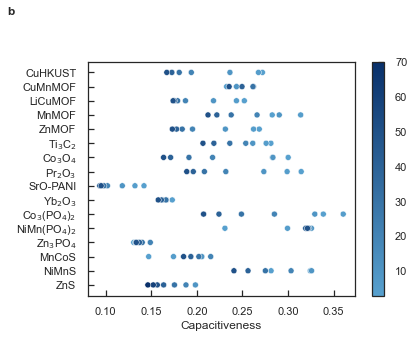

In [150]:
#dir(df_summary.index)
y = list(df_summary.index.get_level_values('Material'))
y = [QR().latexify(each) for each in y]
x = df_summary['Capacitiveness']

sns.set(rc={'figure.figsize':(6,4.3)}, style = 'ticks')
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

norm = plt.Normalize(df_summary['SR'].min(), df_summary['SR'].max())
palette = sns.color_palette("blend:#57A0CE,#09306A", as_cmap=True)
#palette = "Blues"
sm = plt.cm.ScalarMappable(cmap=palette, norm=norm)


sm.set_array([])


g = sns.scatterplot(data = df_summary, x = 'Capacitiveness', y = y, hue = 'SR', 
                    #palette = 'Blues'
                    palette =palette
                   )
#g.legend(frameon = False)
g.get_legend().remove()
g.figure.colorbar(sm)

ecp.plot_modifiers().annotate(labels = 'b', loc = (-0.3, 1.2))
#plt.scatter(x,y, cmap = 'reds')

## <font color = '#EEEEEE'><b>Finis</b> </font>

In [ ]:
# lin_rmse = pd.DataFrame(((m.currents - m.lin_total) ** 2).mean() ** .5).T
# quad_rmse = pd.DataFrame(((m.currents - m.quad_total) ** 2).mean() ** .5).T

m = st.mats.iloc[0,0].cv

lin_rmse = pd.DataFrame(((m.currents - m.lin_total) ** 2).mean() ** .5).T
quad_rmse = pd.DataFrame(((m.currents - m.quad_total) ** 2).mean() ** .5).T

display(st.mats.iloc[0,0].name, lin_rmse, quad_rmse)


In [ ]:
filt = (df_cap_pow_en['SR']=='20')
df_cap_pow_en[filt]

In [1]:
from sys import path as syspath
from os import path as ospath
from os import listdir
import seaborn as sns

#syspath.append(ospath.join(ospath.expanduser("~"), r'\Code_-_Package\EC3'))

#syspath.append(ospath.join(syspath[0], r'\Code_-_Package\EC3'))
syspath.append(r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\--Libraries")
syspath
import AsliGheo

from AsliGheo.AG3._experiments import CV, GCD, EIS, Material, Study, QR
import AsliGheo.AG3._ecplotting as ecp
from AsliGheo.AG3._aesthete import *
from importlib import reload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
reload(AsliGheo.AG3._experiments);
reload(ecp);
reload(AsliGheo.AG3._aesthete);

In [3]:

folder = r"C:\Users\fes33\Documents\GIK - R&D\Personal - Papers and Reports\20 - GCD Model\Data"

from pathlib import Path
p = Path(folder).glob('**/*')
file_names = [x.stem.replace('EC Porridge - ', "") for x in p if x.is_file()]
file_paths = [str(child.resolve()) for child in Path.iterdir(Path(folder))]
file_cat_n_names = [tuple(x.split('_')) for x in file_names]


#____Create Gheo Materials dictionary____
mat_dict = {file_cat_n_names[i]: Material(file_cat_n_names[i][0], file_cat_n_names[i][1],experiments = ['GCD']) for i,f in enumerate(file_paths)};


Material('MOF', 'Mn', experiments = ["GCD"])

['GCD']
['GCD']
